In [500]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
from lightkurve import search_tesscut
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin
from scipy import stats as st
import pandas as pd
from lightkurve import search_targetpixelfile
from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [241]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [531]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand16 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand17 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand18 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand19 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand20 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179985566-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand21 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00270411008-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand22 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand23 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')

In [488]:
tpf1 = search_targetpixelfile('TIC 31273263', sector= 1).download()

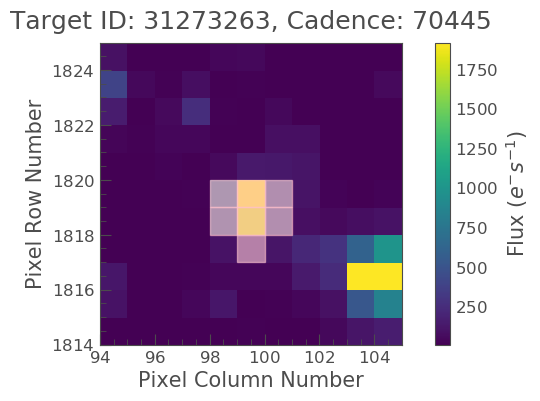

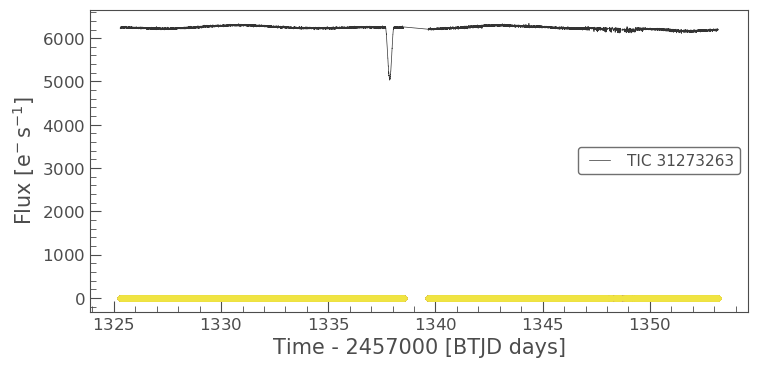

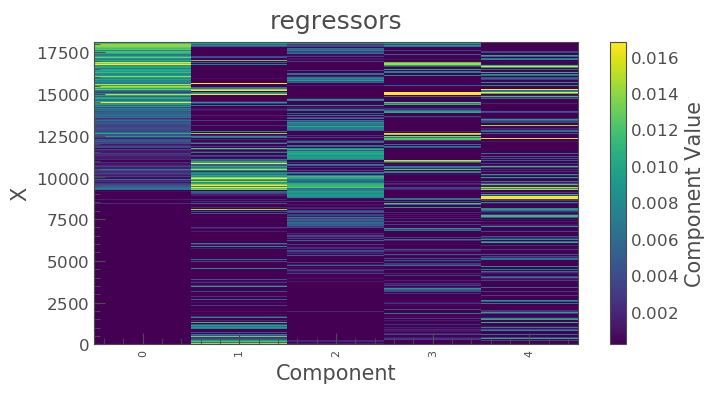

In [489]:
aper1 = tpf1.create_threshold_mask()
tpf1.plot(aperture_mask=aper1)
raw_lc1 = tpf1.to_lightcurve(aperture_mask=aper1)
raw_lc1.plot()

regressors1 = tpf1.flux[:, ~aper1]
regressors1.shape
dm1 = lk.DesignMatrix(regressors1, name='regressors')
dm1 = dm1.pca(5)

plt.plot(tpf1.time, dm1.values + np.arange(5)*0.2, '.')
dm1.plot()

Filename: /Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   


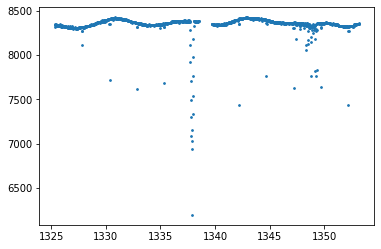

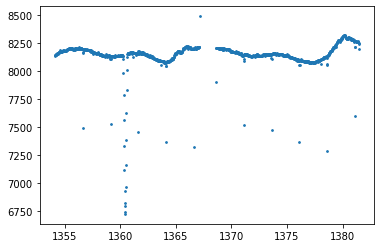

In [452]:
hdul1 = fits.open(cand1)

hdul1.info()
hdul1[0].header
hdul1[2].header
dataset = hdul1[1].data
flux1 = dataset['FLUX_RAW']
flux1_err = dataset['FLUX_RAW_ERR']
fluxbkg = dataset['FLUX_BKG']
time1 = dataset['TIME']
sect = hdul1[0].header['SECTOR']
camera = hdul1[0].header['CAMERA']
CCD = hdul1[0].header['CCD']
aperture = hdul1[3].data
quad = dataset['QUALITY']
pix_quad = dataset['PIXEL_QUALITY']
cado = dataset['CADENCENO']
cent1 = dataset['MOM_CENTR1']
cent2 = dataset['MOM_CENTR2']
plt.scatter(time1,flux1, s=3)
plt.show()


hdul2 = fits.open(cand2)
dataset = hdul2[1].data
flux2 = dataset['FLUX_RAW']
flux2_err = dataset['FLUX_RAW_ERR']
fluxbkg2 = dataset['FLUX_BKG']
time2 = dataset['TIME']
sect = hdul2[0].header['SECTOR']
camera = hdul2[0].header['CAMERA']
CCD = hdul2[0].header['CCD']
aperture2 = hdul2[3].data
quad2 = dataset['QUALITY']
pix_quad2 = dataset['PIXEL_QUALITY']
cado2 = dataset['CADENCENO']
cent12 = dataset['MOM_CENTR1']
cent22 = dataset['MOM_CENTR2']


plt.scatter(time2,flux2, s=3)
plt.show()

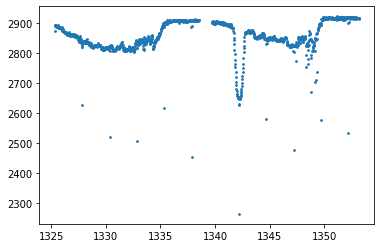

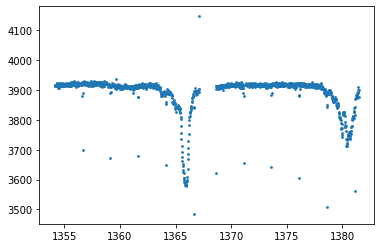

In [532]:
hdul3 = fits.open(cand3)
dataset = hdul3[1].data
flux3 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time3 = dataset['TIME']
cent31 = dataset['MOM_CENTR1']
cent32 = dataset['MOM_CENTR2']

plt.scatter(time3,flux3, s=3)
plt.show()


hdul4 = fits.open(cand4)
dataset = hdul4[1].data
flux4 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time4 = dataset['TIME']
cent41 = dataset['MOM_CENTR1']
cent42 = dataset['MOM_CENTR2']


plt.scatter(time4,flux4, s=3)
plt.show()

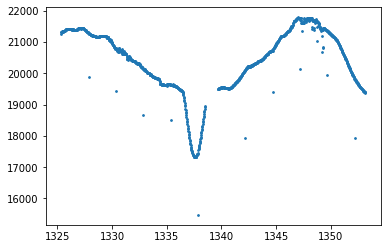

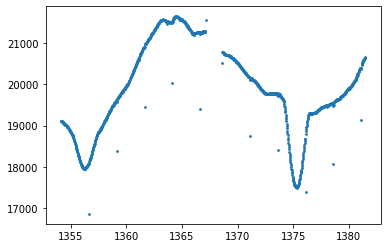

In [535]:
hdul5 = fits.open(cand5)
dataset = hdul5[1].data
flux5 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time5 = dataset['TIME']
cent51 = dataset['MOM_CENTR1']
cent52 = dataset['MOM_CENTR2']

plt.scatter(time5,flux5, s=3)
plt.show()


hdul6 = fits.open(cand6)
dataset = hdul6[1].data
flux6 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time6 = dataset['TIME']
cent61 = dataset['MOM_CENTR1']
cent62 = dataset['MOM_CENTR2']


plt.scatter(time6,flux6, s=3)
plt.show()

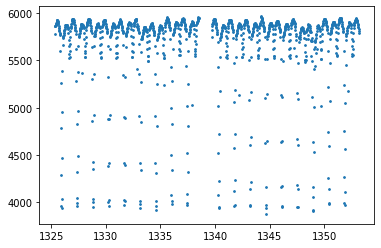

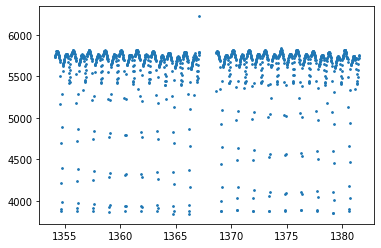

In [541]:
hdul7 = fits.open(cand7)
dataset = hdul7[1].data
flux7 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time7 = dataset['TIME']
cent71 = dataset['MOM_CENTR1']
cent72 = dataset['MOM_CENTR2']

plt.scatter(time7,flux7, s=3)
plt.show()


hdul8 = fits.open(cand8)
dataset = hdul8[1].data
flux8 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time8 = dataset['TIME']
cent81 = dataset['MOM_CENTR1']
cent82 = dataset['MOM_CENTR2']


plt.scatter(time8,flux8, s=3)
plt.show()

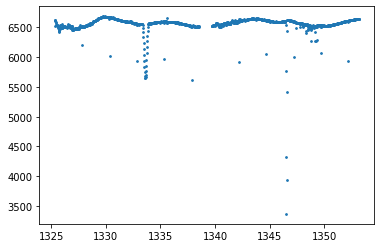

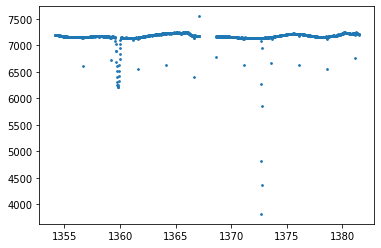

In [543]:
hdul9 = fits.open(cand9)
dataset = hdul9[1].data
flux9 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time9 = dataset['TIME']
cent91 = dataset['MOM_CENTR1']
cent92 = dataset['MOM_CENTR2']

plt.scatter(time9,flux9, s=3)
plt.show()


hdul10 = fits.open(cand10)
dataset = hdul10[1].data
flux10 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time10 = dataset['TIME']
cent101 = dataset['MOM_CENTR1']
cent102 = dataset['MOM_CENTR2']


plt.scatter(time10,flux10, s=3)
plt.show()

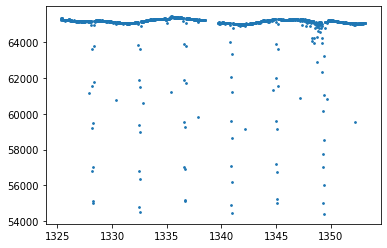

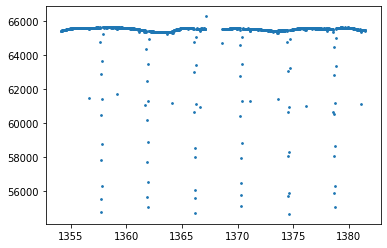

In [547]:
hdul11 = fits.open(cand11)
dataset = hdul11[1].data
flux11 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time11 = dataset['TIME']
cent111 = dataset['MOM_CENTR1']
cent112 = dataset['MOM_CENTR2']

plt.scatter(time11,flux11, s=3)
plt.show()


hdul12 = fits.open(cand12)
dataset = hdul12[1].data
flux12 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time12 = dataset['TIME']
cent121 = dataset['MOM_CENTR1']
cent122 = dataset['MOM_CENTR2']


plt.scatter(time12,flux12, s=3)
plt.show()

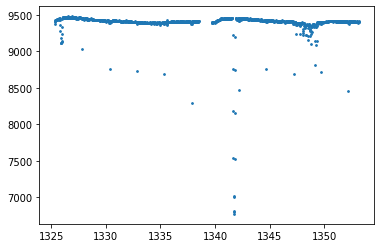

In [549]:
hdul13 = fits.open(cand13)
dataset = hdul13[1].data
flux13 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time13 = dataset['TIME']
cent131 = dataset['MOM_CENTR1']
cent132 = dataset['MOM_CENTR2']

plt.scatter(time13,flux13, s=3)
plt.show()


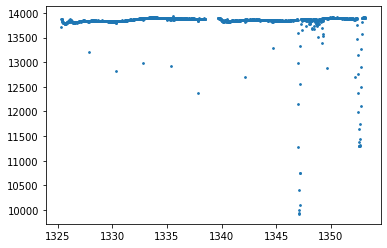

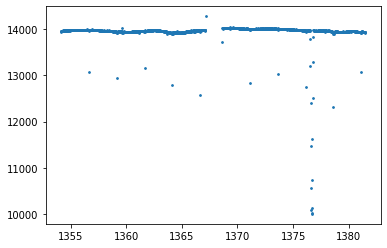

In [552]:
hdul14 = fits.open(cand14)
dataset = hdul14[1].data
flux14 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time14 = dataset['TIME']
cent141 = dataset['MOM_CENTR1']
cent142 = dataset['MOM_CENTR2']

plt.scatter(time14,flux14, s=3)
plt.show()


hdul15 = fits.open(cand15)
dataset = hdul15[1].data
flux15 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time15 = dataset['TIME']
cent151 = dataset['MOM_CENTR1']
cent152 = dataset['MOM_CENTR2']


plt.scatter(time15,flux15, s=3)
plt.show()

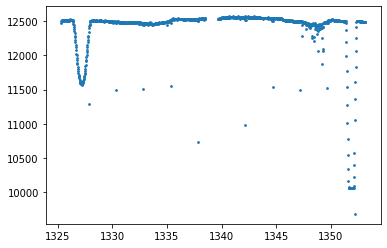

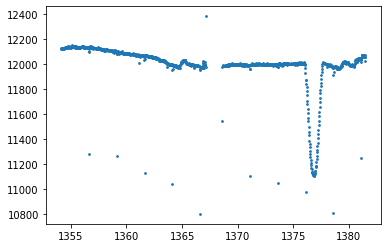

In [554]:
hdul16 = fits.open(cand16)
dataset = hdul16[1].data
flux16 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time16 = dataset['TIME']
cent161 = dataset['MOM_CENTR1']
cent162 = dataset['MOM_CENTR2']

plt.scatter(time16,flux16, s=3)
plt.show()


hdul17 = fits.open(cand17)
dataset = hdul17[1].data
flux17 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time17 = dataset['TIME']
cent171 = dataset['MOM_CENTR1']
cent172 = dataset['MOM_CENTR2']


plt.scatter(time17,flux17, s=3)
plt.show()

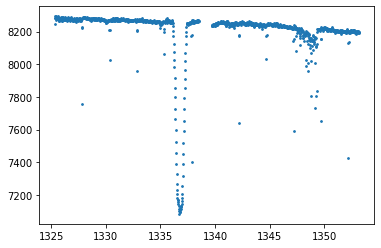

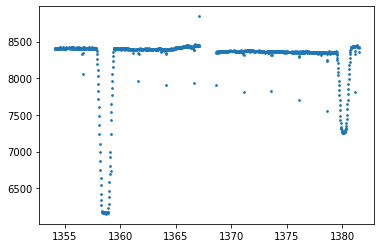

In [573]:
hdul18 = fits.open(cand18)
dataset = hdul18[1].data
flux18 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time18 = dataset['TIME']
cent181 = dataset['MOM_CENTR1']
cent182 = dataset['MOM_CENTR2']

plt.scatter(time18,flux18, s=3)
plt.show()


hdul19 = fits.open(cand19)
dataset = hdul19[1].data
flux19 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time19 = dataset['TIME']
cent191 = dataset['MOM_CENTR1']
cent192 = dataset['MOM_CENTR2']


plt.scatter(time19,flux19, s=3)
plt.show()

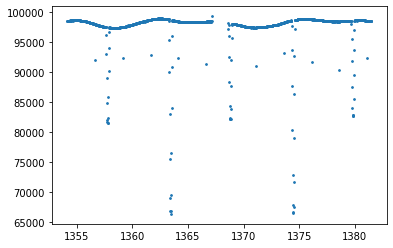

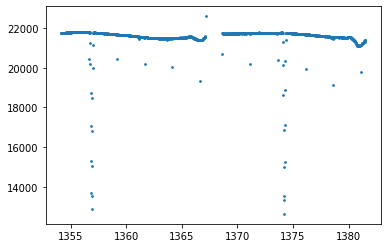

In [582]:
hdul20 = fits.open(cand20)
dataset = hdul20[1].data
flux20 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time20 = dataset['TIME']
cent201 = dataset['MOM_CENTR1']
cent202 = dataset['MOM_CENTR2']

plt.scatter(time20,flux20, s=3)
plt.show()


hdul21 = fits.open(cand21)
dataset = hdul21[1].data
flux21 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time21 = dataset['TIME']
cent211 = dataset['MOM_CENTR1']
cent212 = dataset['MOM_CENTR2']


plt.scatter(time21,flux21, s=3)
plt.show()

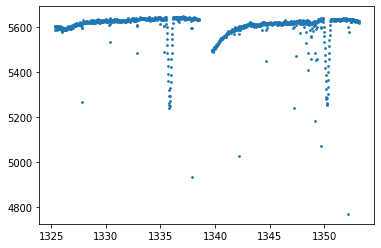

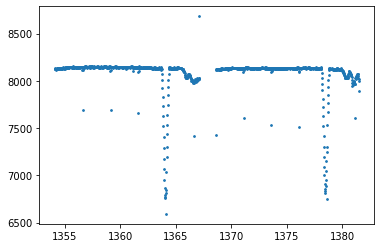

In [589]:
hdul22 = fits.open(cand22)
dataset = hdul22[1].data
flux22 = dataset['FLUX_RAW']
fluxbkg = dataset['FLUX_BKG']
time22 = dataset['TIME']
cent221 = dataset['MOM_CENTR1']
cent222 = dataset['MOM_CENTR2']

plt.scatter(time22,flux22, s=3)
plt.show()


hdul23 = fits.open(cand23)
dataset = hdul23[1].data
flux23 = dataset['FLUX_RAW']
fluxbkg2 = dataset['FLUX_BKG']
time23 = dataset['TIME']
cent231 = dataset['MOM_CENTR1']
cent232 = dataset['MOM_CENTR2']


plt.scatter(time23,flux23, s=3)
plt.show()

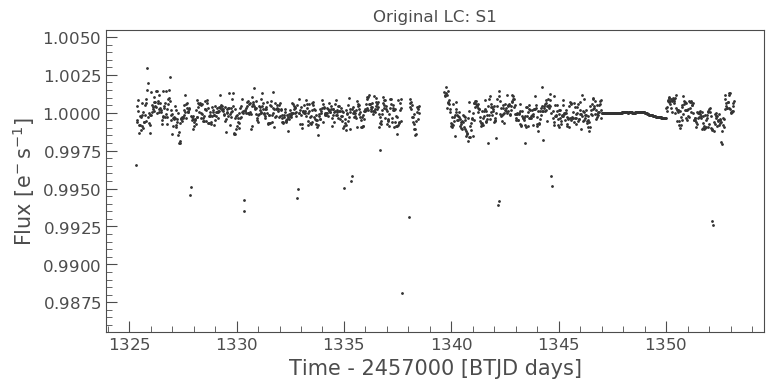

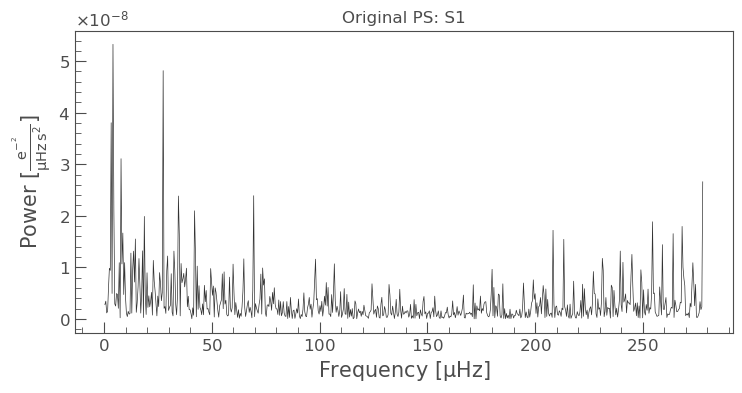

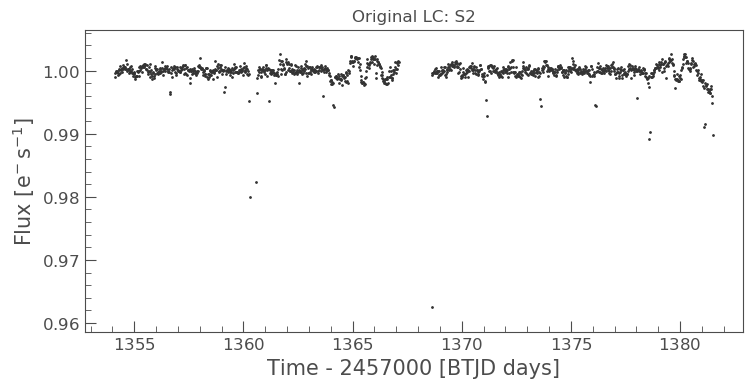

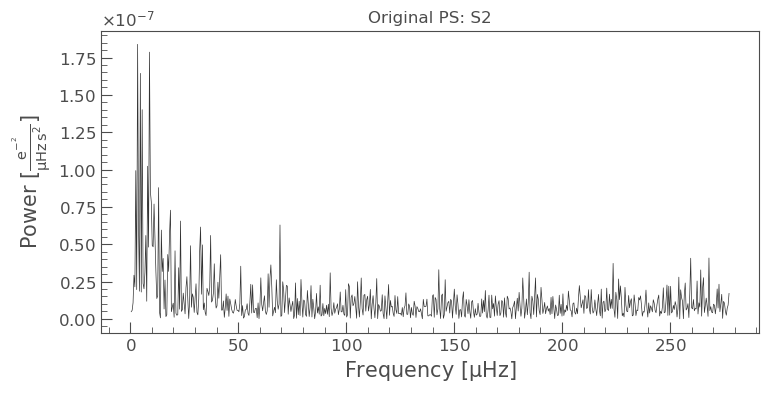

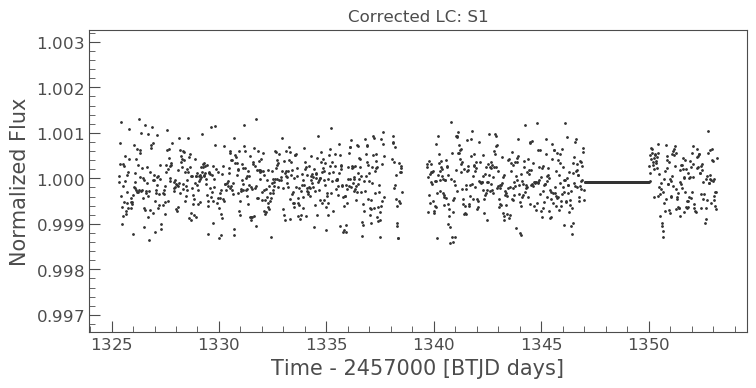

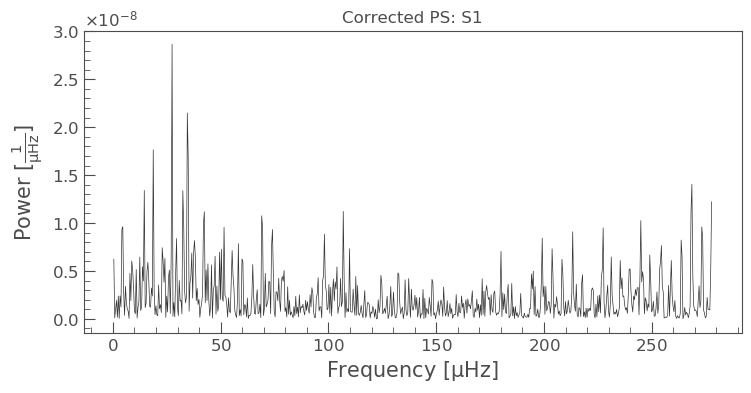

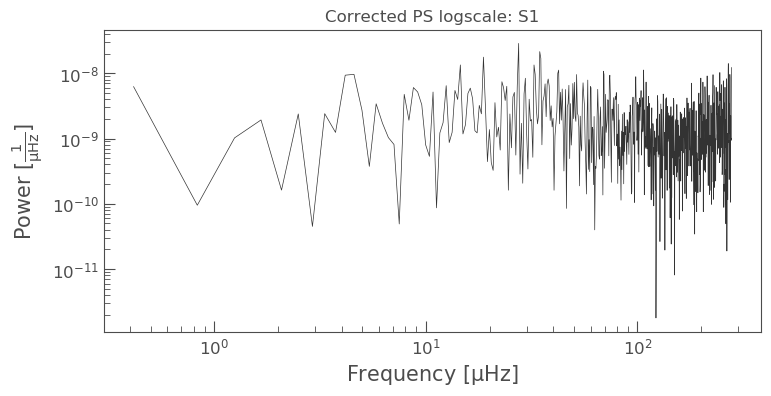

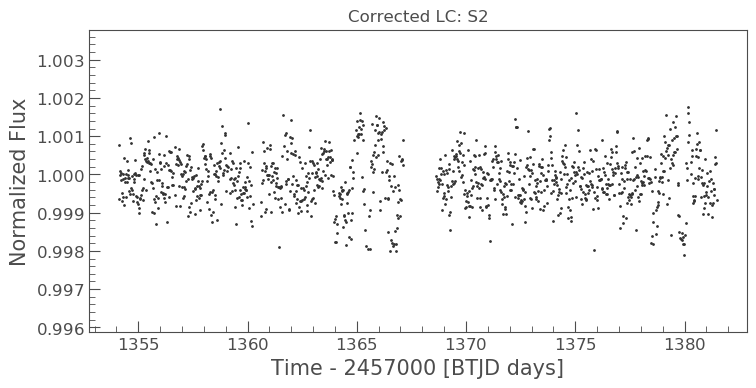

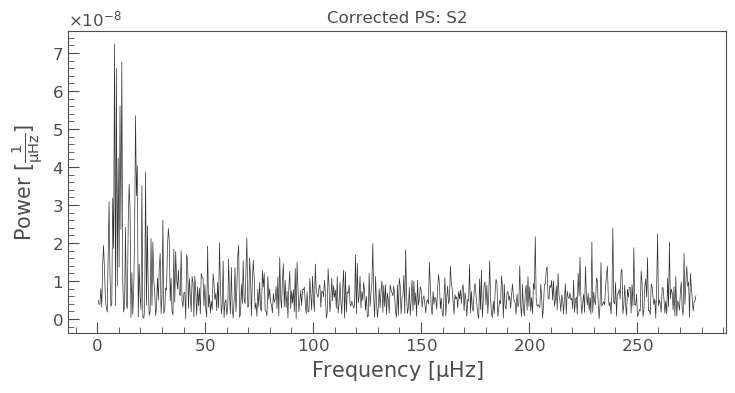

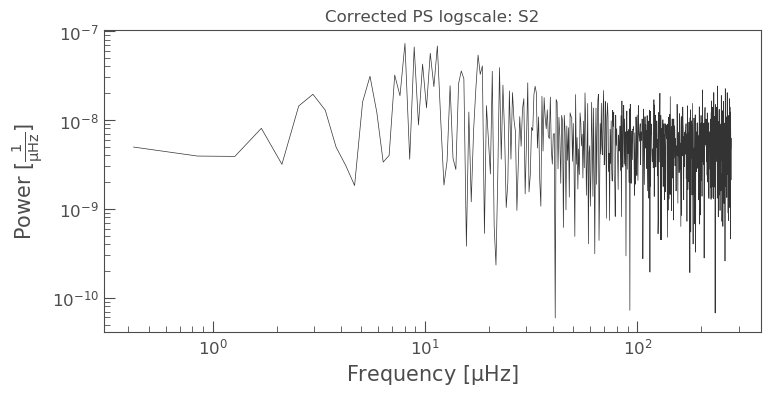

Text(0.5, 1.0, 'Combined Power Logged')

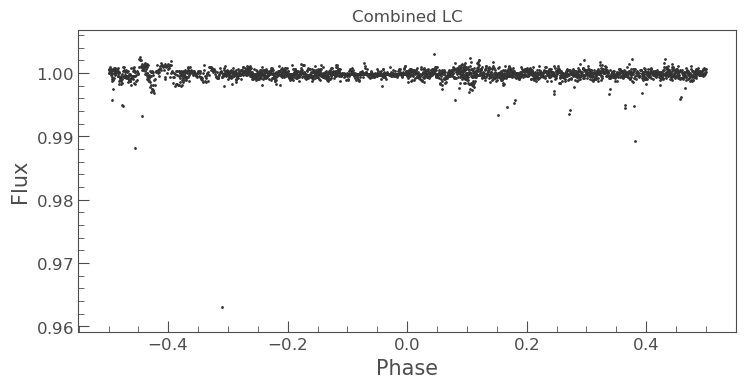

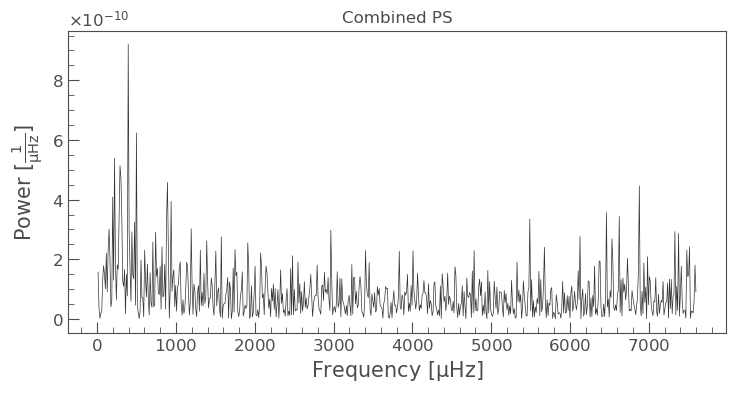

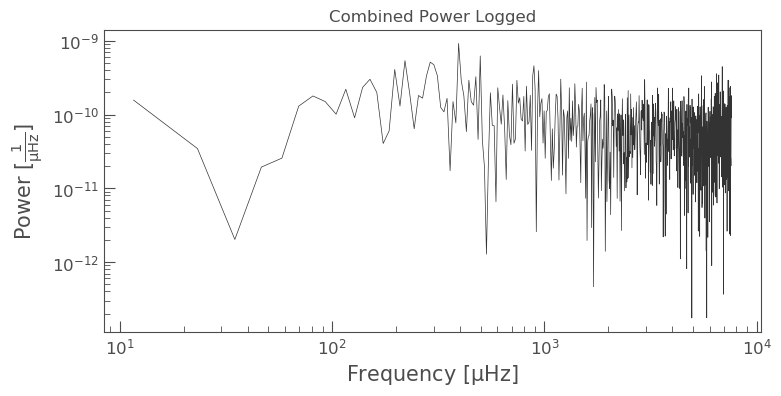

In [613]:

model1 = lk.TessLightCurve(time1,flux1,centroid_col = cent2, centroid_row = cent1).remove_nans().remove_outliers().flatten(window_length=145)
model1.scatter()
plt.title('Original LC: S1')
plt.show()
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
power1.plot()
plt.title('Original PS: S1')
plt.show()

model2 = lk.TessLightCurve(time2,flux2, centroid_col = cent22, centroid_row = cent12).remove_nans().remove_outliers().flatten(window_length=145)
model2.scatter()
plt.title('Original LC: S2')
plt.show()
power2 = model2.to_periodogram(method='lombscargle', normalization="psd")
power2.plot()
plt.title('Original PS: S2')
plt.show()


corrector = model1.remove_nans().to_corrector()
corrected_lc1 = corrector.correct()

condition = ((corrected_lc1.time > 1347) & (corrected_lc1.time < 1350))
corrected_lc1.flux[condition] = np.median(corrected_lc1.flux)

corrected_lc1.remove_outliers(sigma_lower=3, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power1 =corrected_lc1.to_periodogram(method='lombscargle', normalization="psd")
corr_power1.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power1.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()

corrector2 = model2.remove_nans().to_corrector()
corrected_lc2 = corrector2.correct()

corrected_lc2.remove_outliers(sigma_lower=3, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power2 =corrected_lc2.to_periodogram(method='lombscargle', normalization="psd")
corr_power2.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power2.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()

#Now to combine and see
combined = corrected_lc1.append(corrected_lc2)
combined = combined.fold(period=27)
combined.scatter()
plt.title('Combined LC')
combined_power = combined.to_periodogram(method='lombscargle', normalization="psd")
combined_power.plot()
plt.title('Combined PS')
combined_power.plot(scale='log')
plt.title('Combined Power Logged')



#Need to detrend the lightcurve against predicted vectors of systematic noise 
#Linear regression can be a way to estimate the scatter/noise 
#begin with taking the aperture and using the "flux" outside of the aperature and assuming it is noise
#and does not hold true signal flux. 
#first is to create the regressors which need to be in matrix form with time and 'unwanted' flux
#then create the Design matrix to use for linear regression
#then complete linear regression to find best fitted model and determine outliners we can deem noise
#correct lightcurve based on the noise


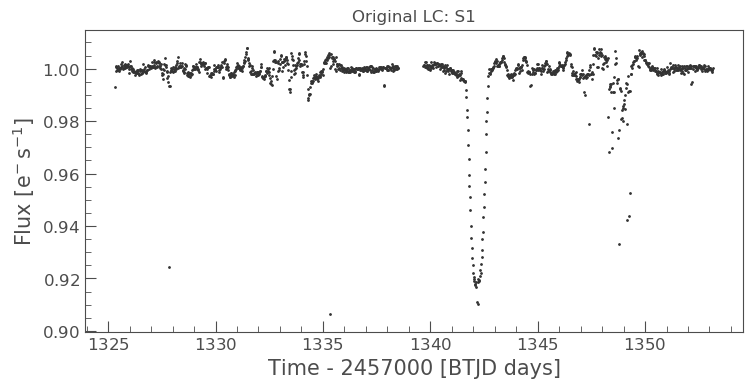

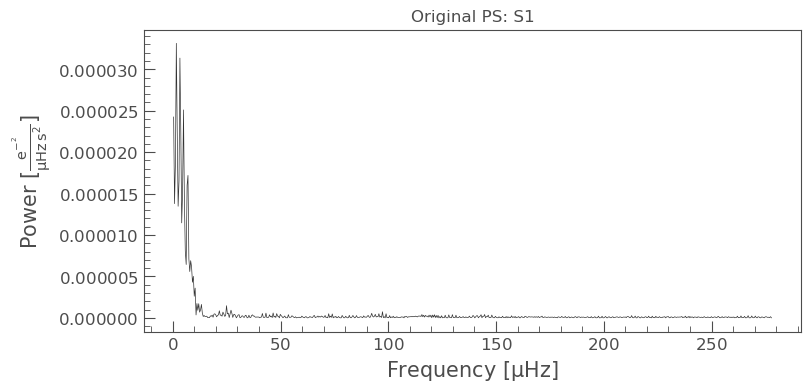

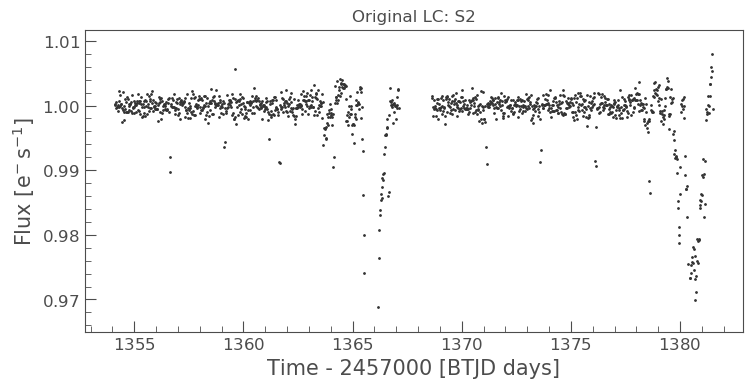

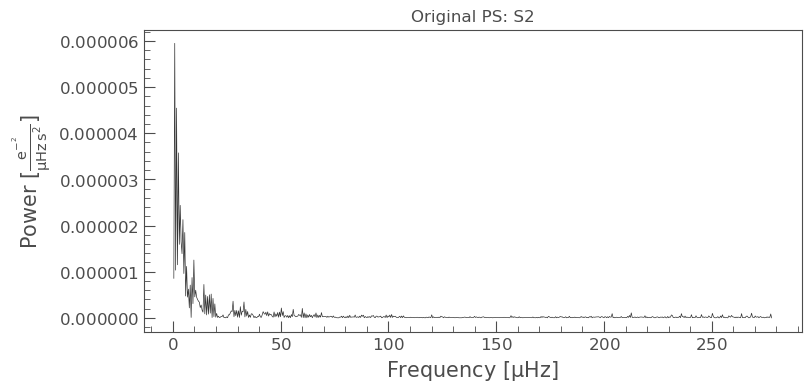

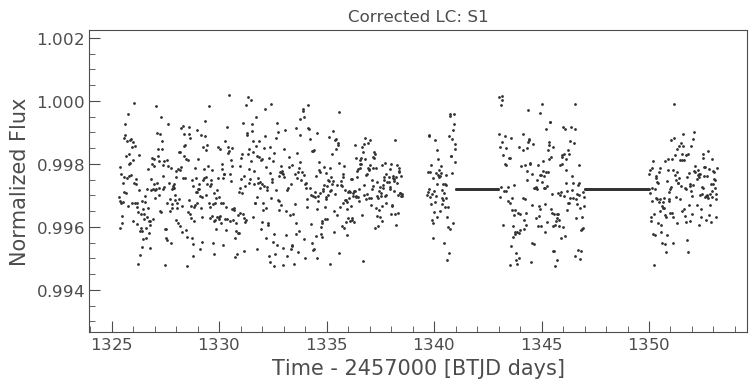

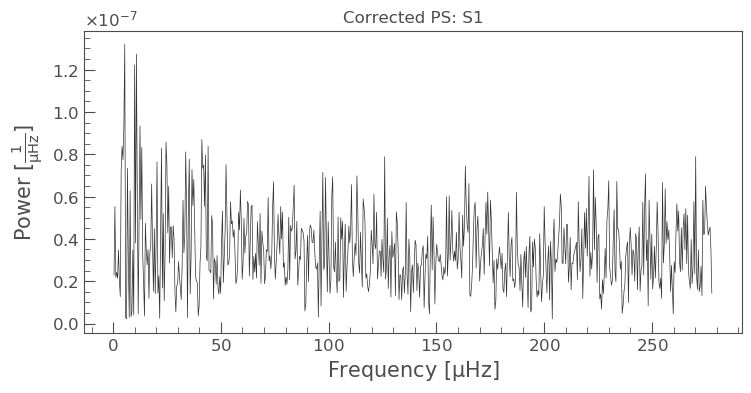

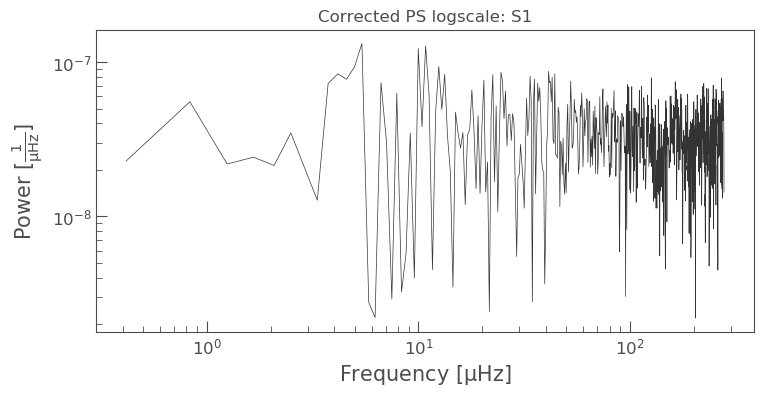

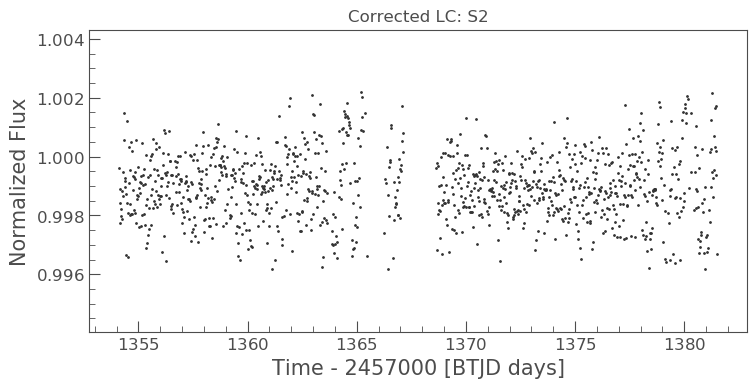

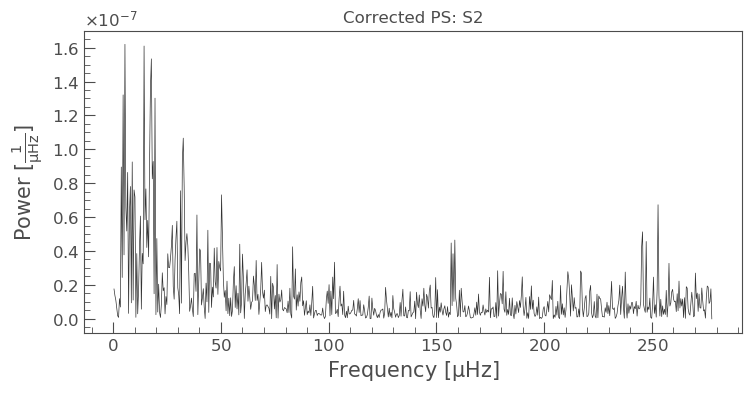

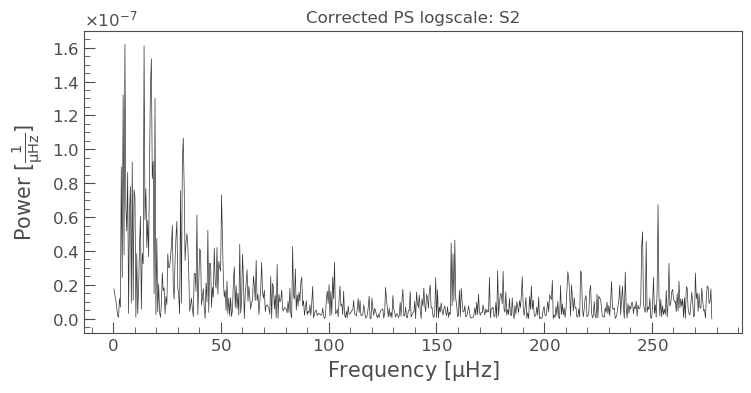

Text(0.5, 1.0, 'Combined Power Logged')

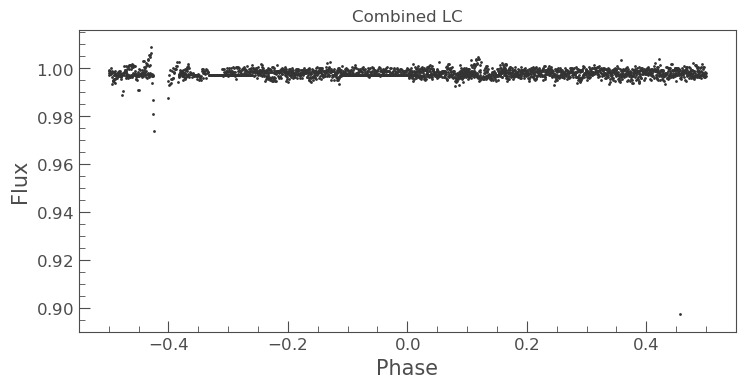

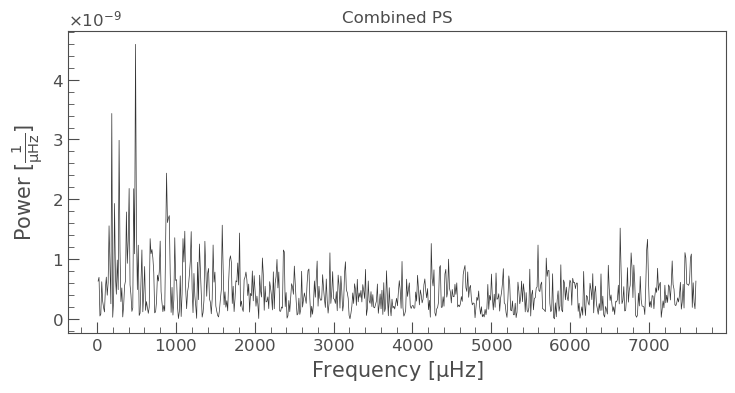

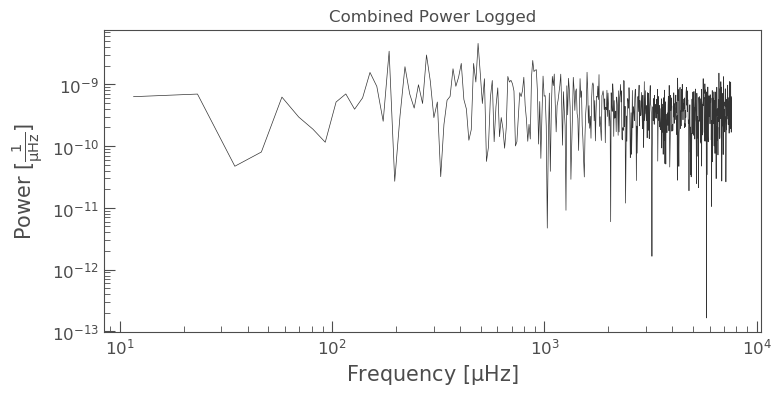

In [614]:
model3 = lk.TessLightCurve(time3,flux3,centroid_col = cent32, centroid_row = cent31).remove_nans().remove_outliers().flatten(window_length=145)
model3.scatter()
plt.title('Original LC: S1')
plt.show()
power3 = model3.to_periodogram(method='lombscargle', normalization="psd")
power3.plot()
plt.title('Original PS: S1')
plt.show()

model4 = lk.TessLightCurve(time4,flux4, centroid_col = cent42, centroid_row = cent41).remove_nans().remove_outliers().flatten(window_length=145)
model4.scatter()
plt.title('Original LC: S2')
plt.show()
power4 = model4.to_periodogram(method='lombscargle', normalization="psd")
power4.plot()
plt.title('Original PS: S2')
plt.show()


corrector3 = model3.remove_nans().to_corrector()
corrected_lc3 = corrector3.correct()

condition = ((corrected_lc3.time > 1347) & (corrected_lc3.time < 1350))
condition |=((corrected_lc3.time > 1341) & (corrected_lc3.time < 1343))
corrected_lc3.flux[condition] = np.median(corrected_lc3.flux)

corrected_lc3.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power3 =corrected_lc3.to_periodogram(method='lombscargle', normalization="psd")
corr_power3.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power3.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()

corrector4 = model4.remove_nans().to_corrector()
corrected_lc4 = corrector4.correct()

corrected_lc4.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power4 =corrected_lc4.to_periodogram(method='lombscargle', normalization="psd")
corr_power4.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power4.plot()
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined2 = corrected_lc3.append(corrected_lc4)
combined2 = combined2.fold(period=27)
combined2.scatter()
plt.title('Combined LC')
combined_power2 = combined2.to_periodogram(method='lombscargle', normalization="psd")
combined_power2.plot()
plt.title('Combined PS')
combined_power2.plot(scale='log')
plt.title('Combined Power Logged')

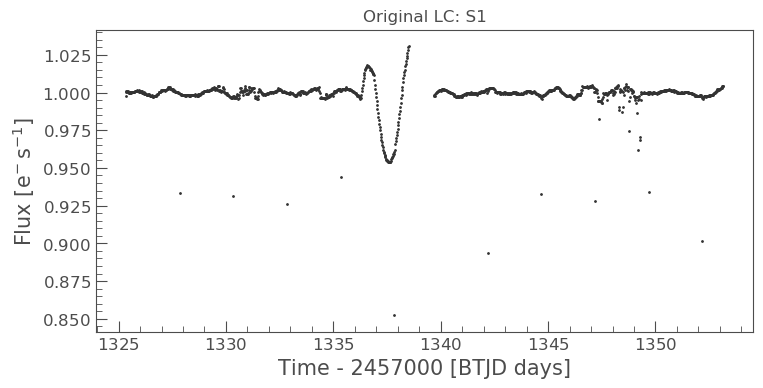

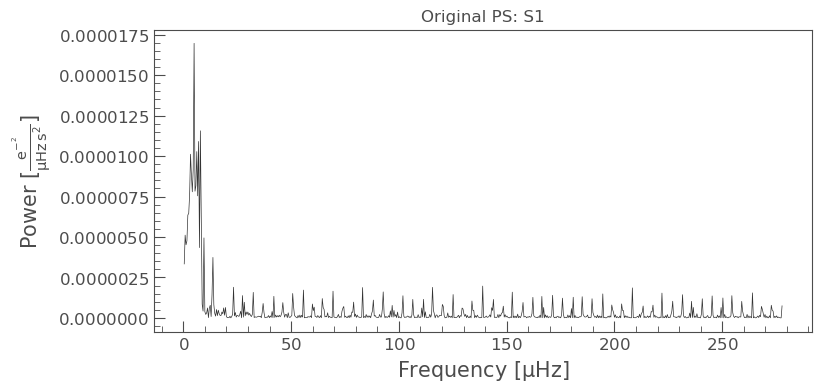

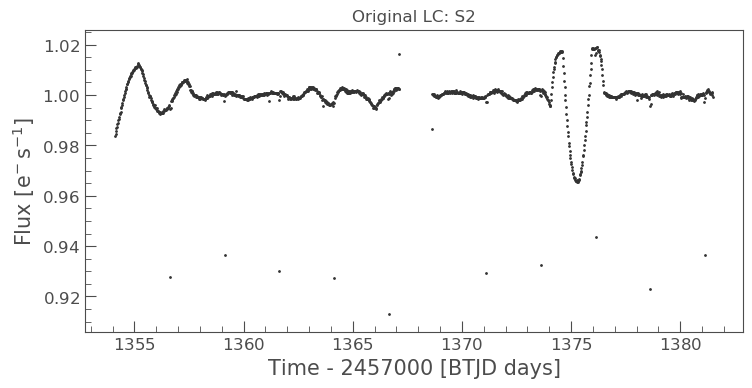

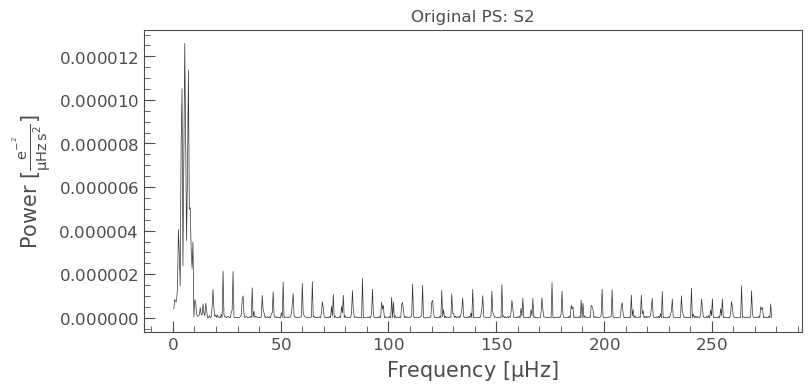

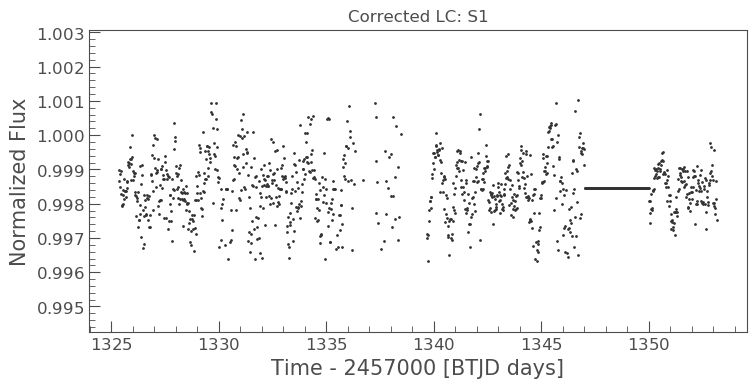

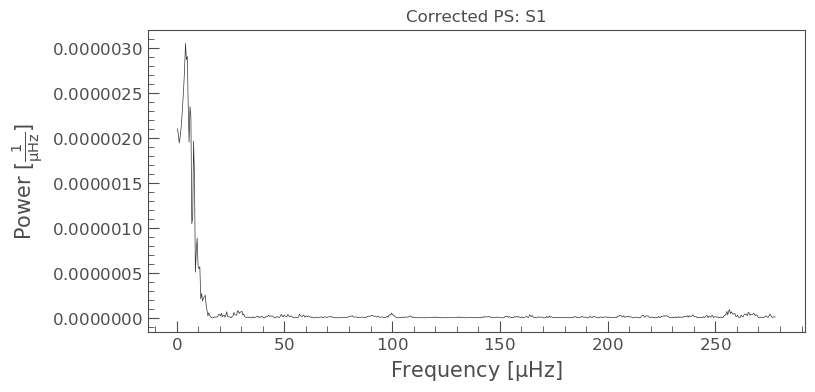

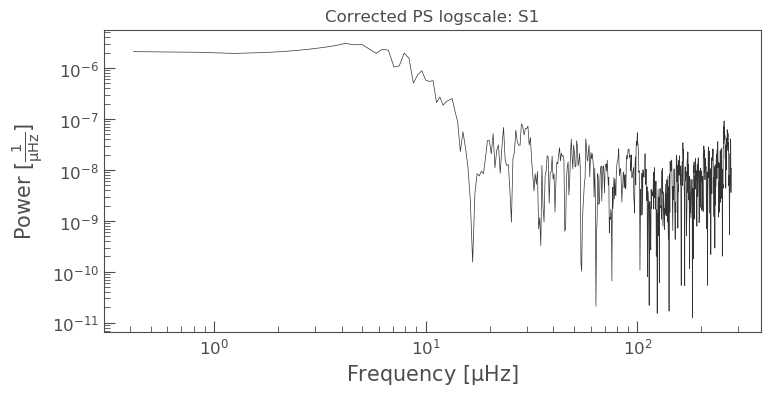

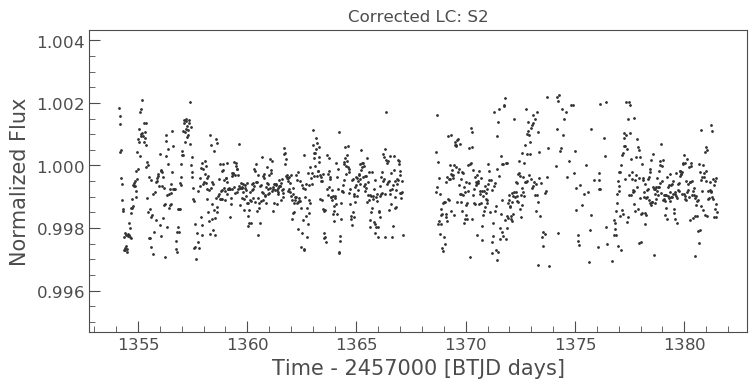

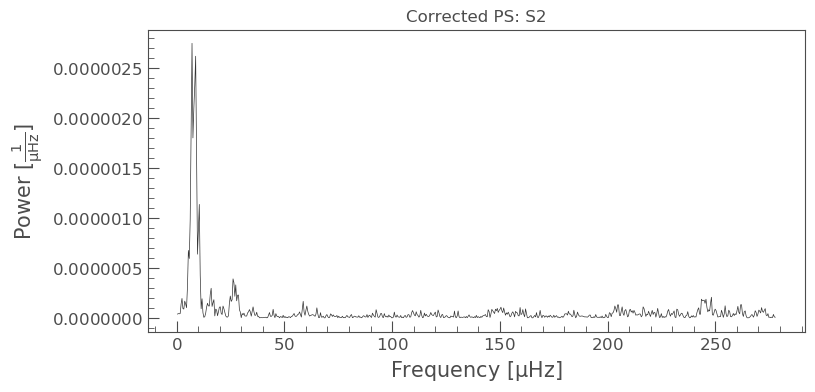

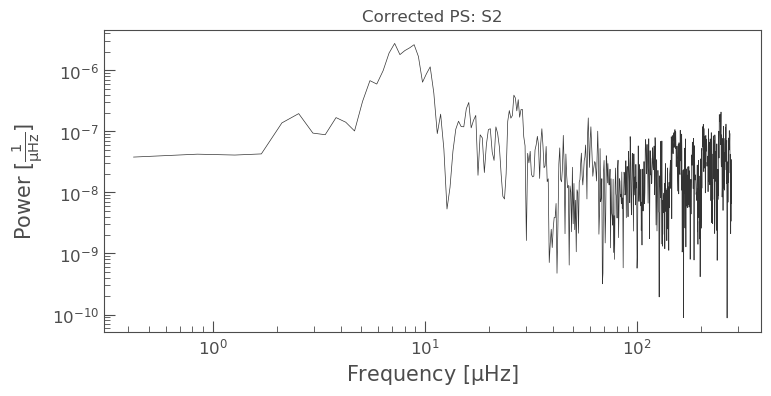

Text(0.5, 1.0, 'Combined Power Logged')

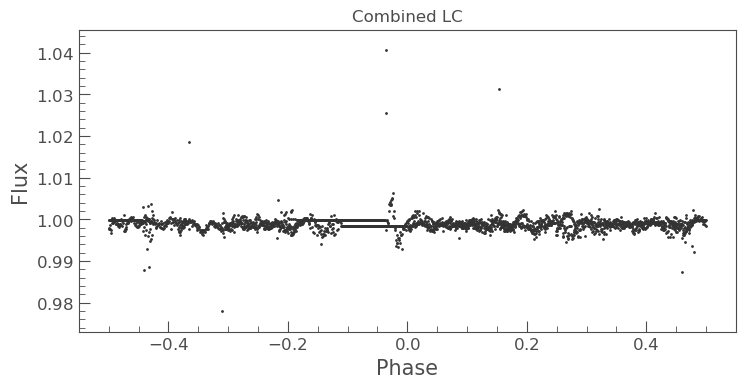

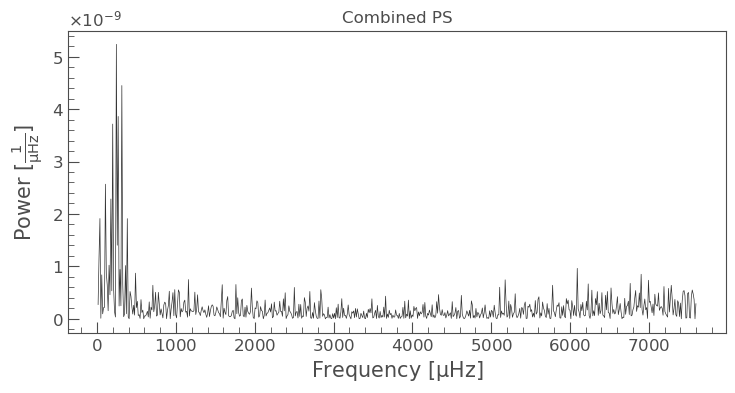

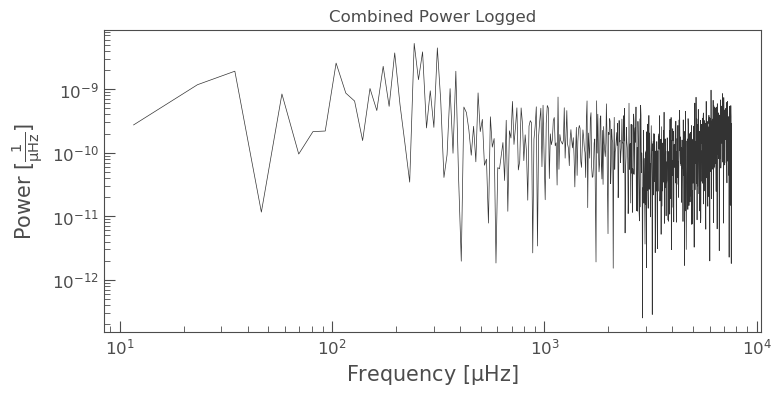

In [616]:
model5 = lk.TessLightCurve(time5,flux5,centroid_col = cent52, centroid_row = cent51).remove_nans().remove_outliers().flatten(window_length=145)
model5.scatter()
plt.title('Original LC: S1')
plt.show()
power5 = model5.to_periodogram(method='lombscargle', normalization="psd")
power5.plot()
plt.title('Original PS: S1')
plt.show()

model6 = lk.TessLightCurve(time6,flux6, centroid_col = cent62, centroid_row = cent61).remove_nans().remove_outliers().flatten(window_length=145)
model6.scatter()
plt.title('Original LC: S2')
plt.show()
power6 = model6.to_periodogram(method='lombscargle', normalization="psd")
power6.plot()
plt.title('Original PS: S2')
plt.show()


corrector5 = model5.remove_nans().to_corrector()
corrected_lc5 = corrector5.correct()

condition = ((corrected_lc5.time > 1347) & (corrected_lc5.time < 1350))
corrected_lc5.flux[condition] = np.median(corrected_lc5.flux)

corrected_lc5.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power5 =corrected_lc5.to_periodogram(method='lombscargle', normalization="psd")
corr_power5.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power5.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()


corrector6 = model6.remove_nans().to_corrector()
corrected_lc6 = corrector6.correct()

corrected_lc6.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power6 =corrected_lc6.to_periodogram(method='lombscargle', normalization="psd")
corr_power6.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power6.plot(scale = 'log')
plt.title('Corrected PS: S2')
plt.show()


#Now to combine and see
combined3 = corrected_lc5.append(corrected_lc6)
condition = ((combined3.time > 1372) & (combined3.time < 1376))
condition |= ((combined3.time > 1336) & (combined3.time < 1338))
combined3.flux[condition] = np.median(combined.flux)
combined3 = combined3.fold(period=27)
combined3.scatter()
plt.title('Combined LC')
combined_power3 = combined3.to_periodogram(method='lombscargle', normalization="psd")
combined_power3.plot()
plt.title('Combined PS')
combined_power3.plot(scale='log')
plt.title('Combined Power Logged')

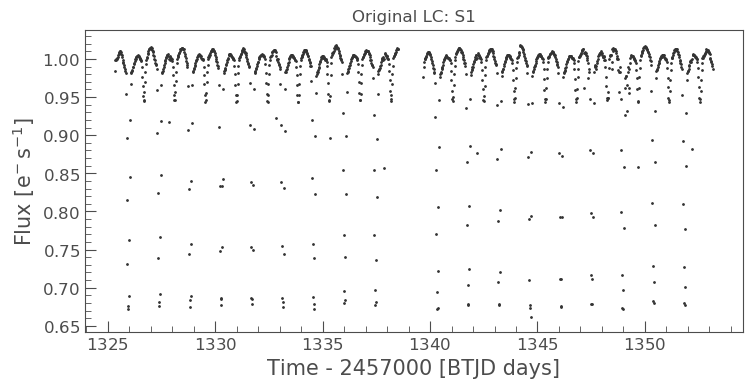

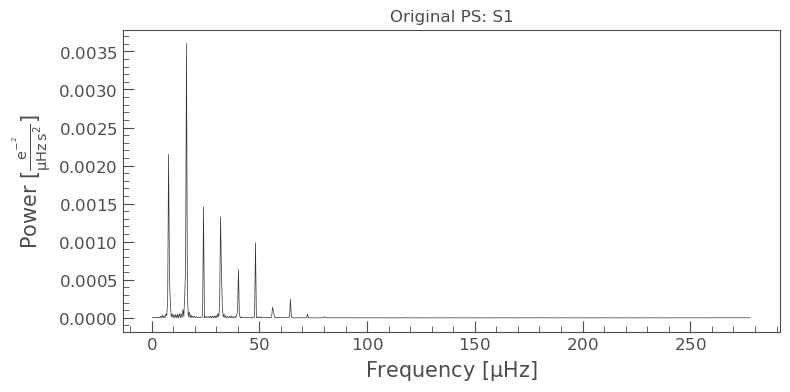

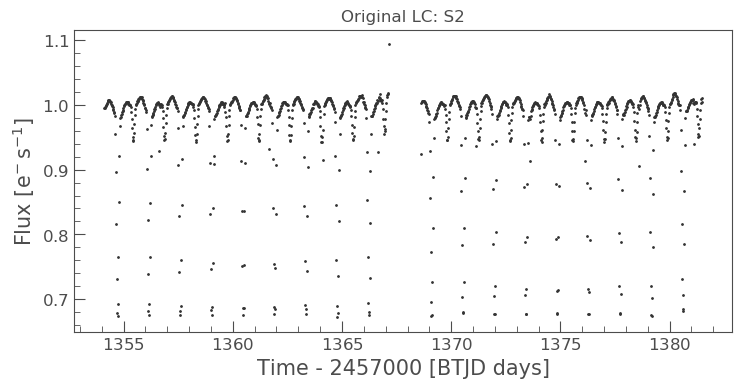

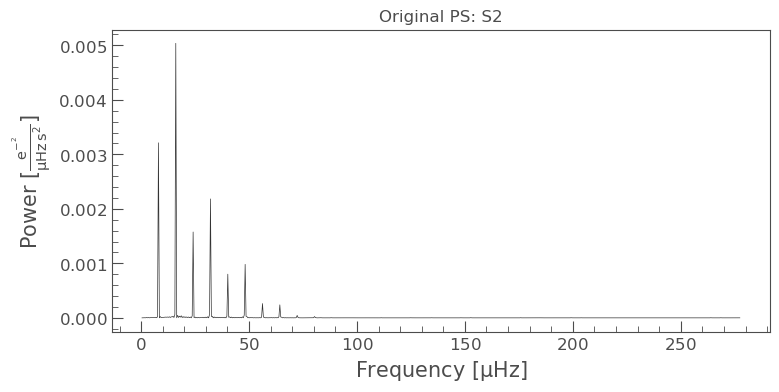

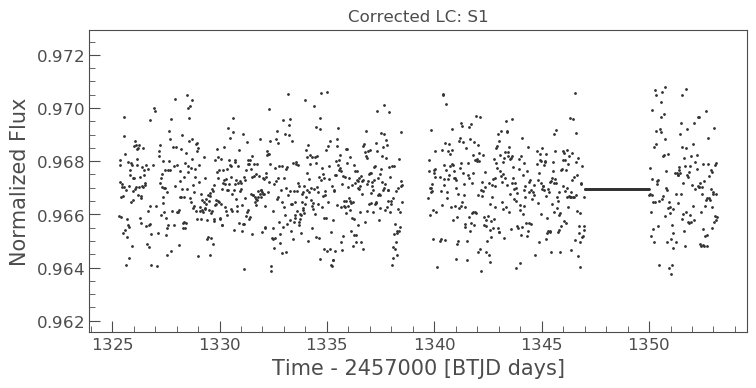

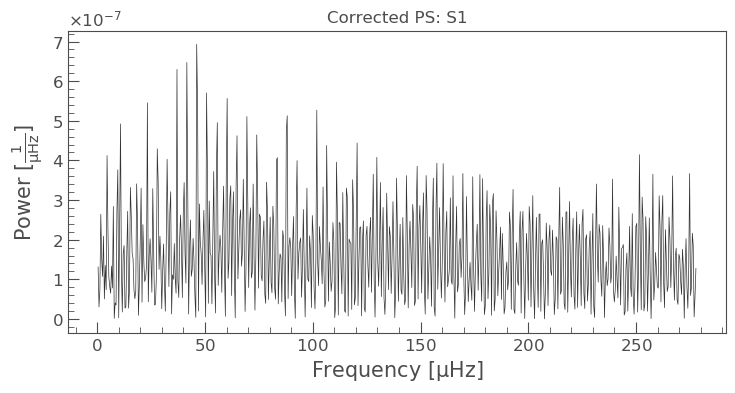

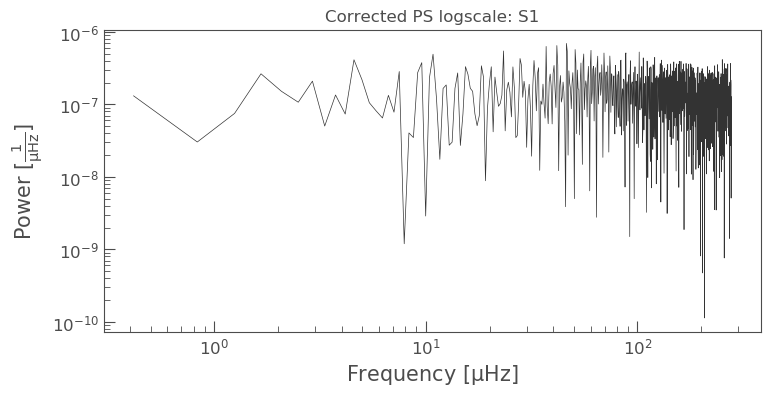

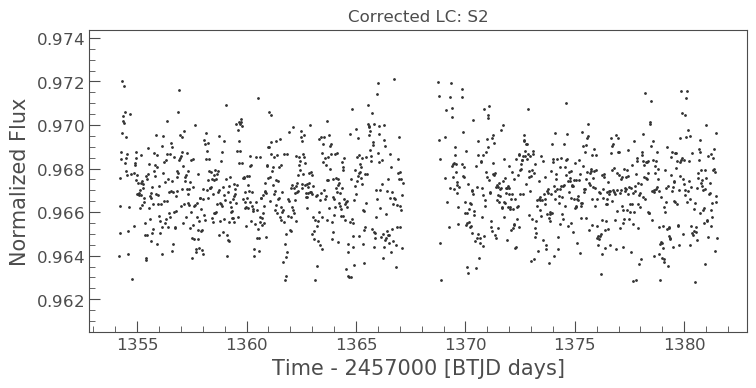

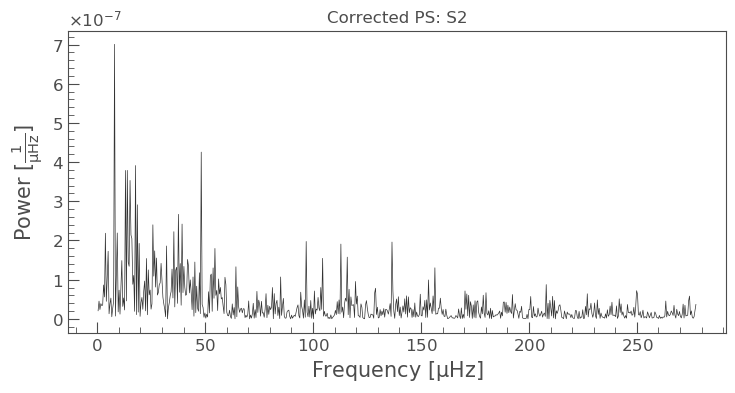

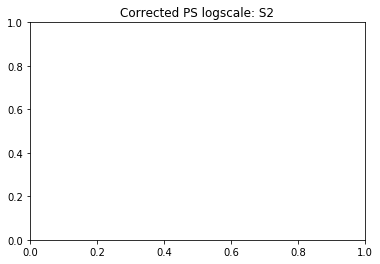

Text(0.5, 1.0, 'Combined Power Logged')

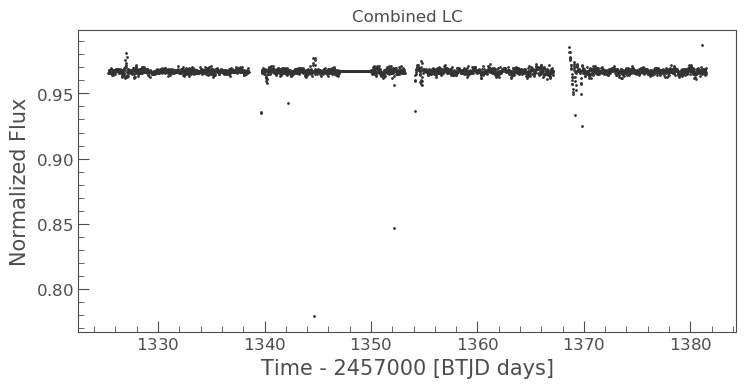

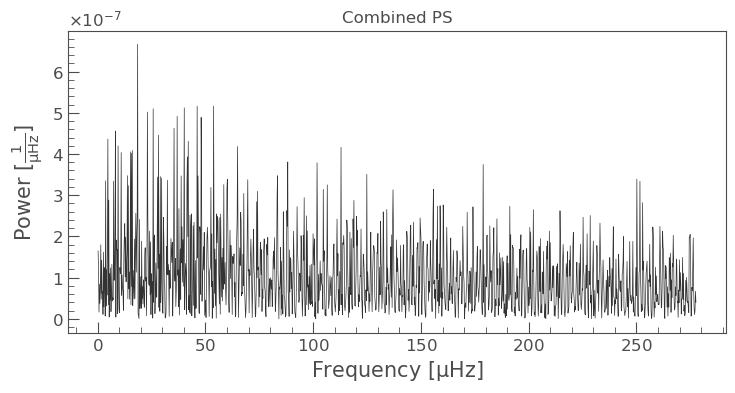

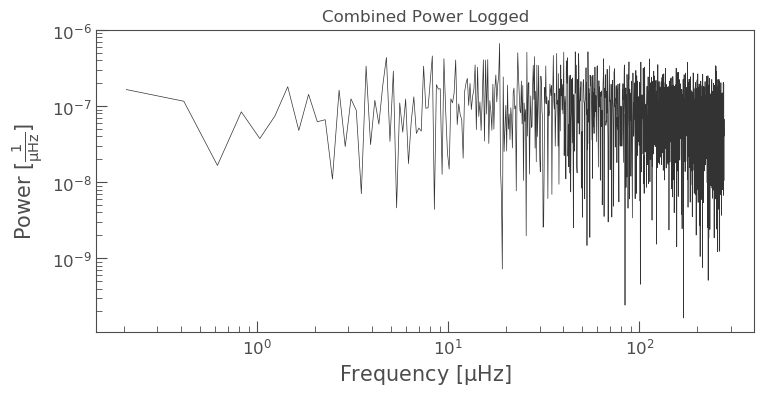

In [617]:
model7 = lk.TessLightCurve(time7,flux7,centroid_col = cent72, centroid_row = cent71).remove_nans().remove_outliers().flatten(window_length=145)
model7.scatter()
plt.title('Original LC: S1')
plt.show()
power7 = model7.to_periodogram(method='lombscargle', normalization="psd")
power7.plot()
plt.title('Original PS: S1')
plt.show()

model8 = lk.TessLightCurve(time8,flux8, centroid_col = cent82, centroid_row = cent81).remove_nans().remove_outliers().flatten(window_length=145)
model8.scatter()
plt.title('Original LC: S2')
plt.show()
power8 = model8.to_periodogram(method='lombscargle', normalization="psd")
power8.plot()
plt.title('Original PS: S2')
plt.show()


corrector7 = model7.remove_nans().to_corrector()
corrected_lc7 = corrector7.correct()

condition = ((corrected_lc7.time > 1347) & (corrected_lc7.time < 1350))
corrected_lc7.flux[condition] = np.median(corrected_lc7.flux)

corrected_lc7.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power7 =corrected_lc7.to_periodogram(method='lombscargle', normalization="psd")
corr_power7.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power7.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()


corrector8 = model8.remove_nans().to_corrector()
corrected_lc8 = corrector8.correct()

corrected_lc8.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power8 =corrected_lc8.to_periodogram(method='lombscargle', normalization="psd")
corr_power8.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power8.plotscale = 'log'
plt.title('Corrected PS logscale: S2')
plt.show()



#Now to combine and see
combined4 = corrected_lc7.append(corrected_lc8)
combined4.scatter()
plt.title('Combined LC')
combined_power4 = combined4.to_periodogram(method='lombscargle', normalization="psd")
combined_power4.plot()
plt.title('Combined PS')
combined_power4.plot(scale='log')
plt.title('Combined Power Logged')

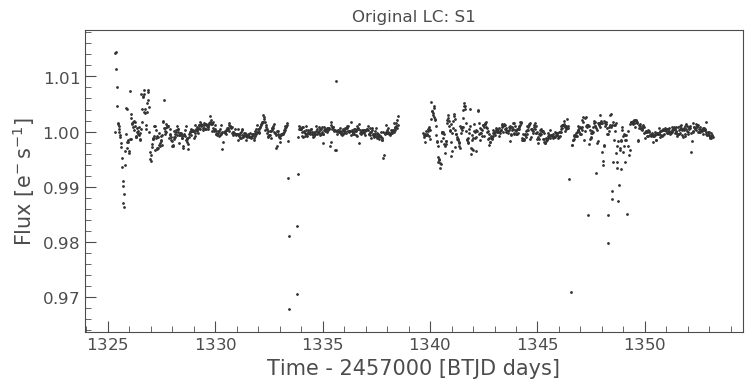

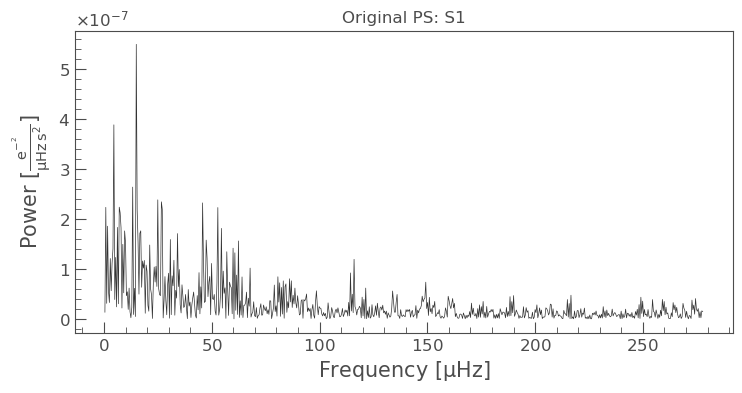

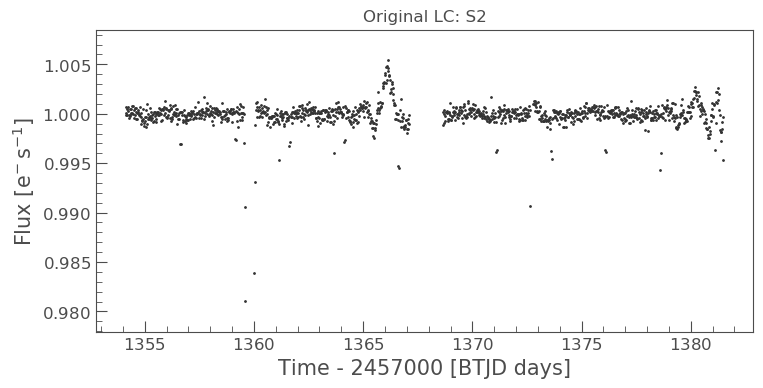

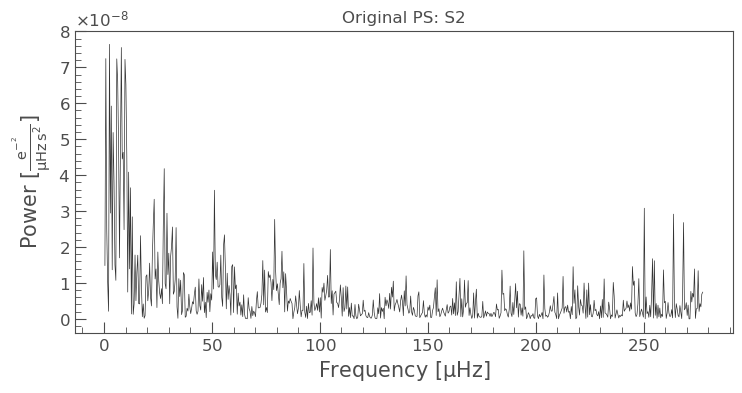

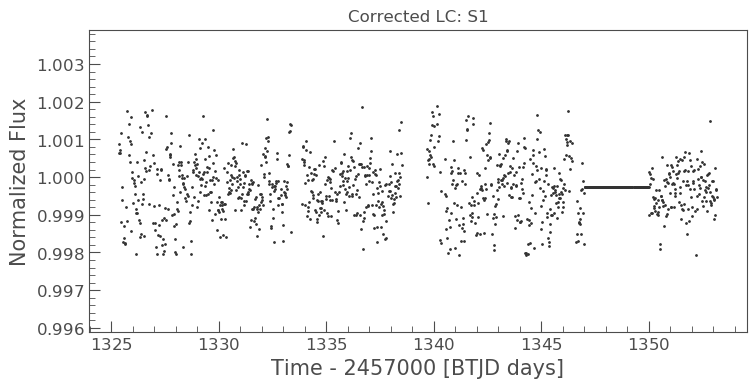

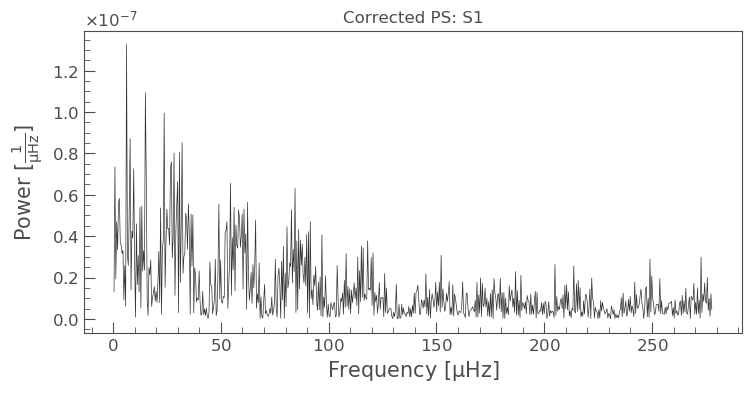

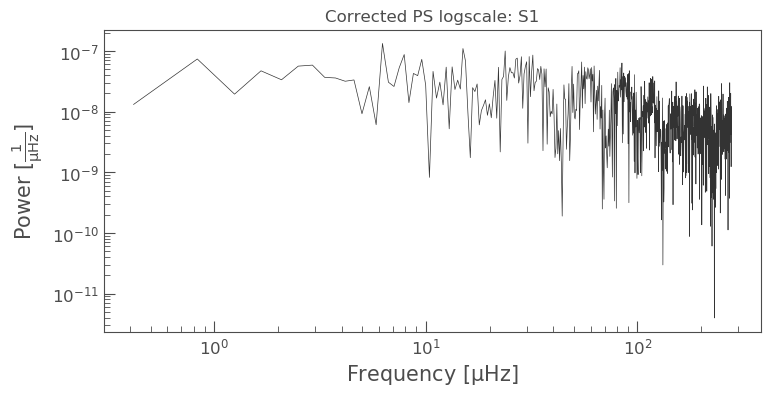

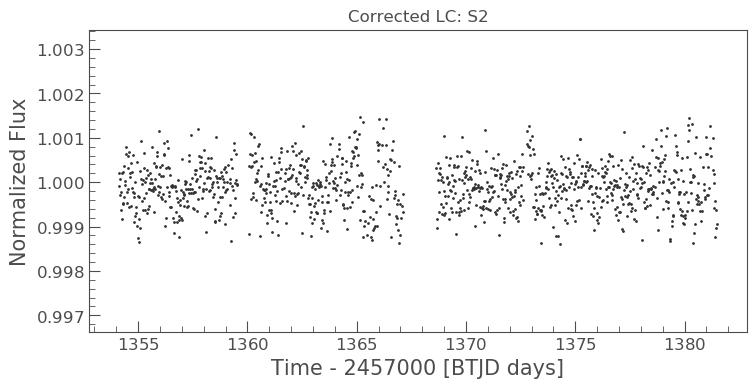

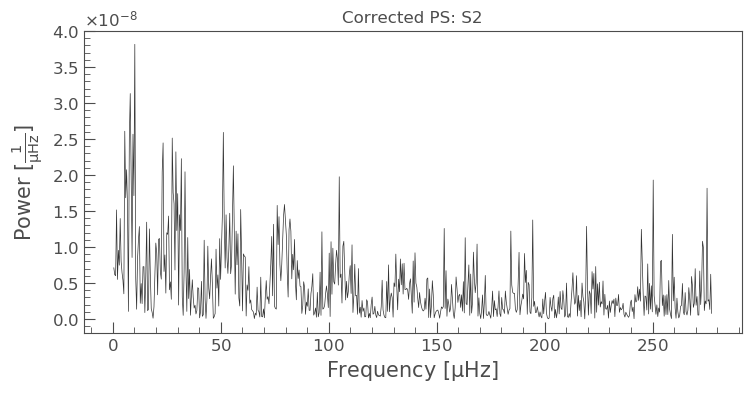

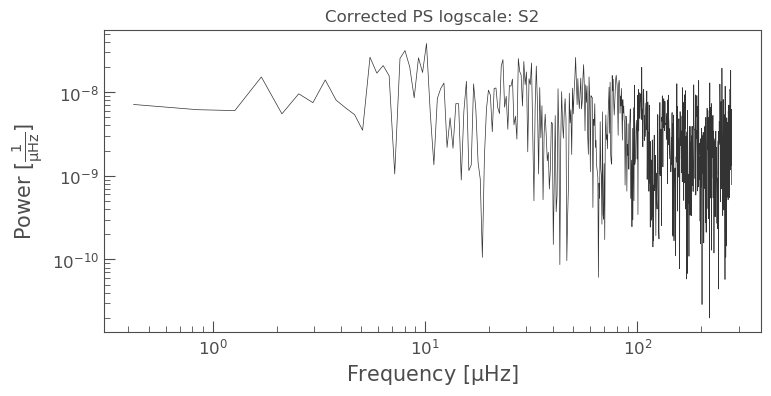

Text(0.5, 1.0, 'Combined Power Logged')

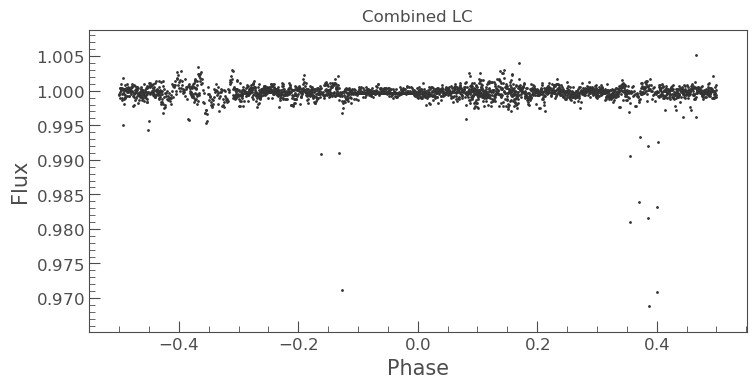

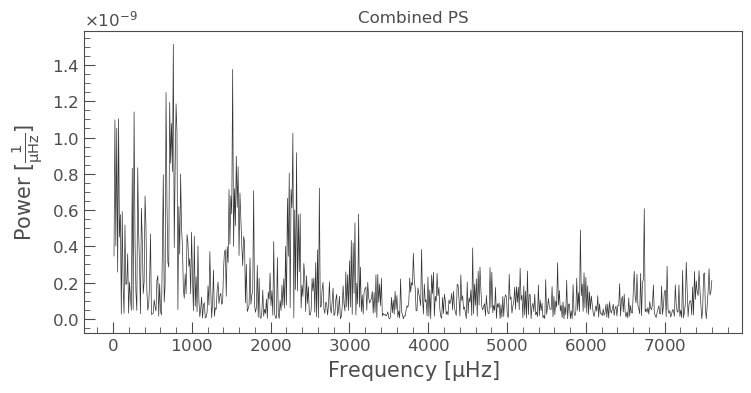

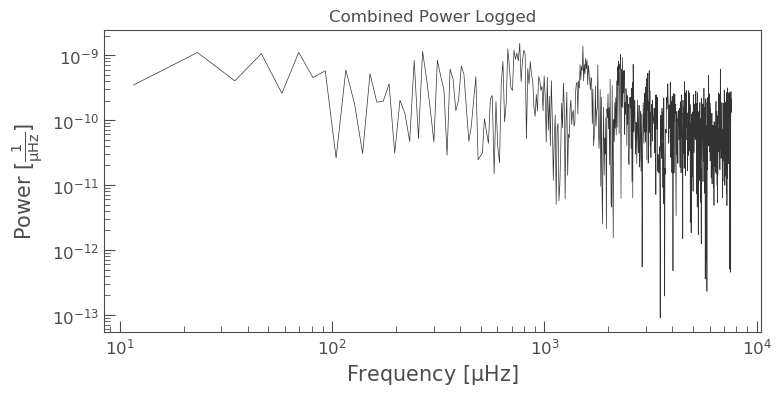

In [618]:
model9 = lk.TessLightCurve(time9,flux9,centroid_col = cent92, centroid_row = cent91).remove_nans().remove_outliers().flatten(window_length=145)
model9.scatter()
plt.title('Original LC: S1')
plt.show()
power9 = model9.to_periodogram(method='lombscargle', normalization="psd")
power9.plot()
plt.title('Original PS: S1')
plt.show()

model10 = lk.TessLightCurve(time10,flux10, centroid_col = cent102, centroid_row = cent101).remove_nans().remove_outliers().flatten(window_length=145)
model10.scatter()
plt.title('Original LC: S2')
plt.show()
power10 = model10.to_periodogram(method='lombscargle', normalization="psd")
power10.plot()
plt.title('Original PS: S2')
plt.show()


corrector9 = model9.remove_nans().to_corrector()
corrected_lc9 = corrector9.correct()

condition = ((corrected_lc9.time > 1347) & (corrected_lc9.time < 1350))
corrected_lc9.flux[condition] = np.median(corrected_lc9.flux)

corrected_lc9.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power9 =corrected_lc9.to_periodogram(method='lombscargle', normalization="psd")
corr_power9.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power9.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()



corrector10 = model10.remove_nans().to_corrector()
corrected_lc10 = corrector10.correct()

corrected_lc10.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power10 =corrected_lc10.to_periodogram(method='lombscargle', normalization="psd")
corr_power10.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power10.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined5 = corrected_lc9.append(corrected_lc10)
combined5 = combined5.fold(period=27)
combined5.remove_outliers(sigma_lower = 2)
combined5.scatter()
plt.title('Combined LC')
combined_power5 = combined5.to_periodogram(method='lombscargle', normalization="psd")
combined_power5.plot()
plt.title('Combined PS')
combined_power5.plot(scale='log')
plt.title('Combined Power Logged')

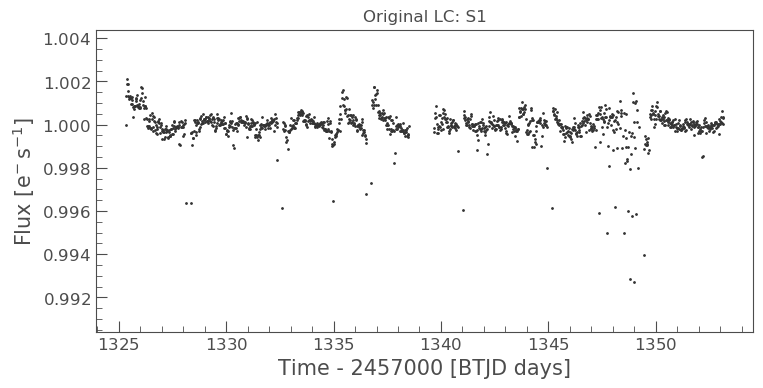

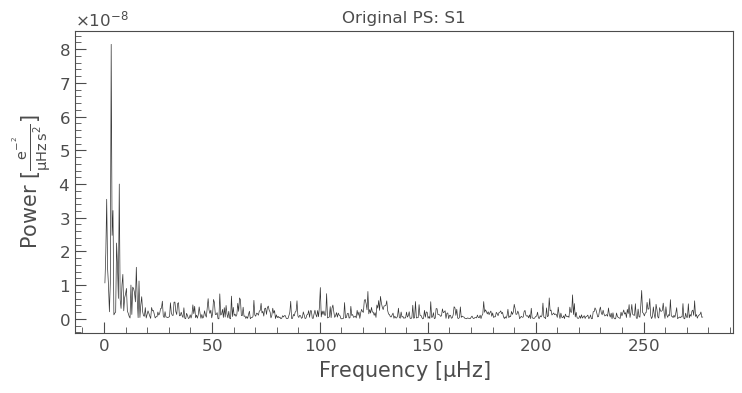

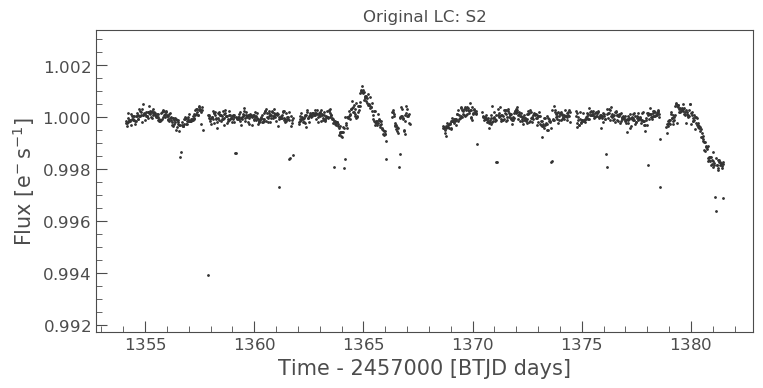

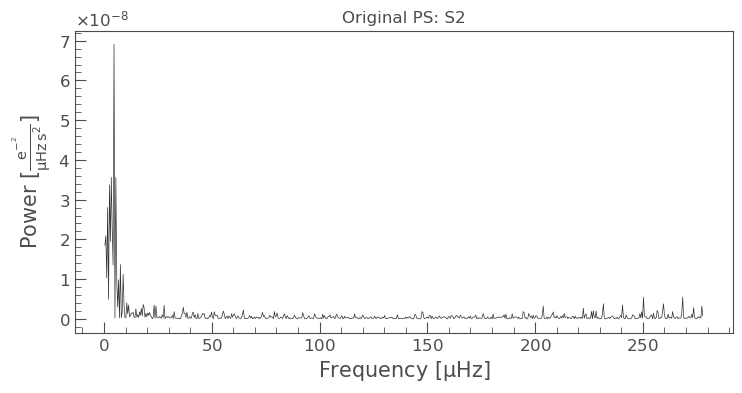

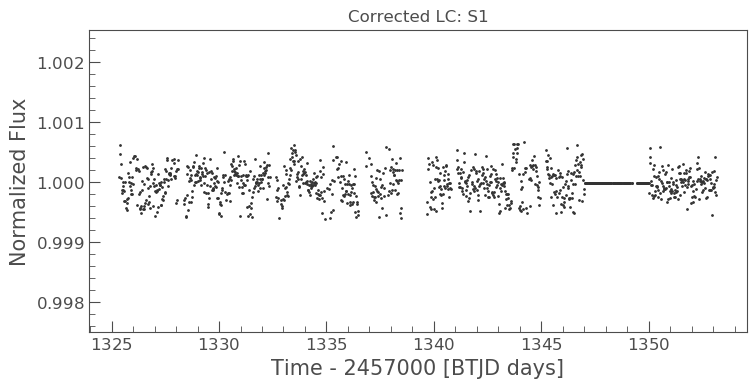

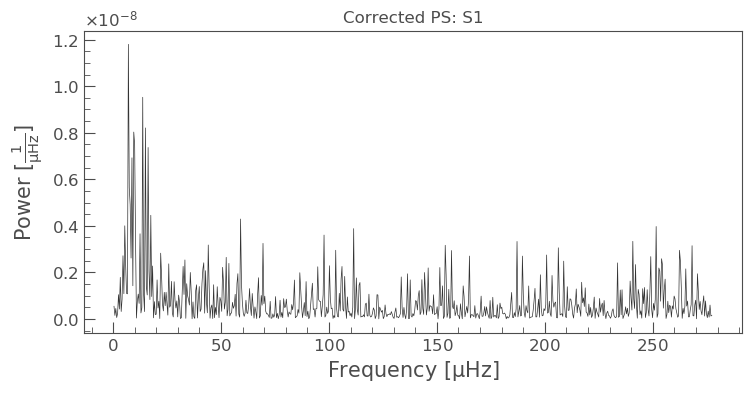

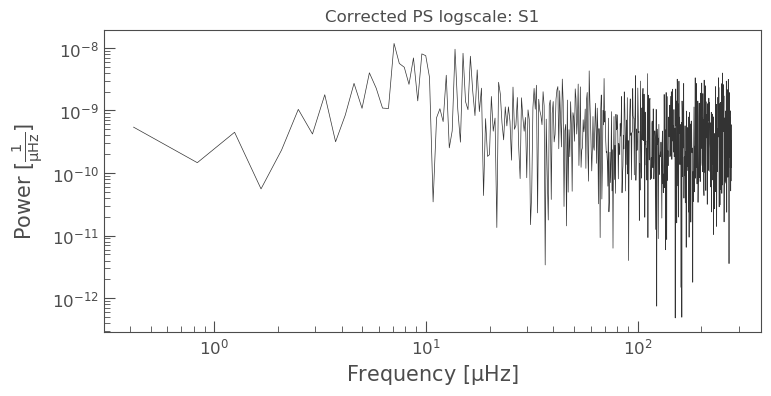

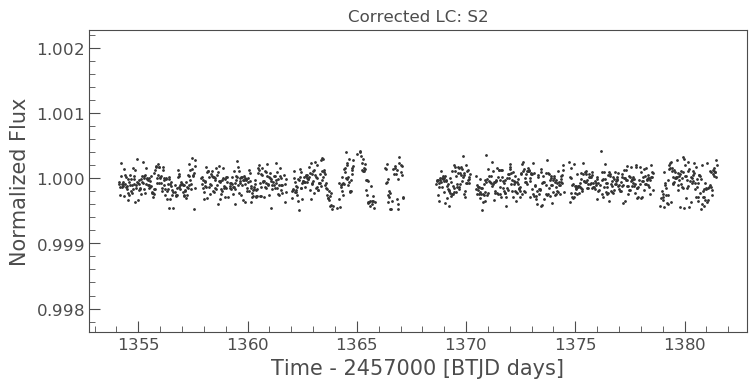

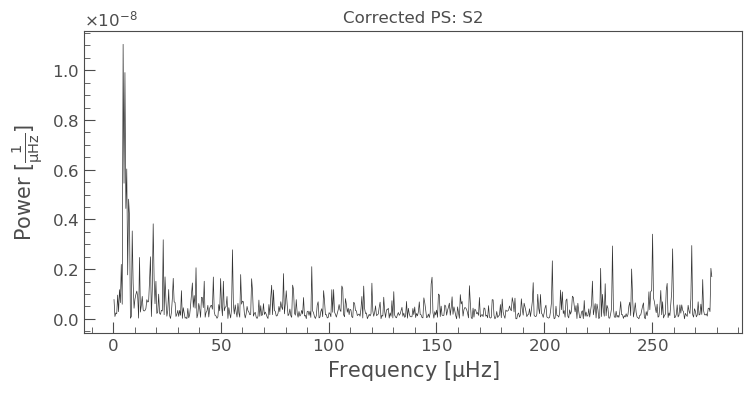

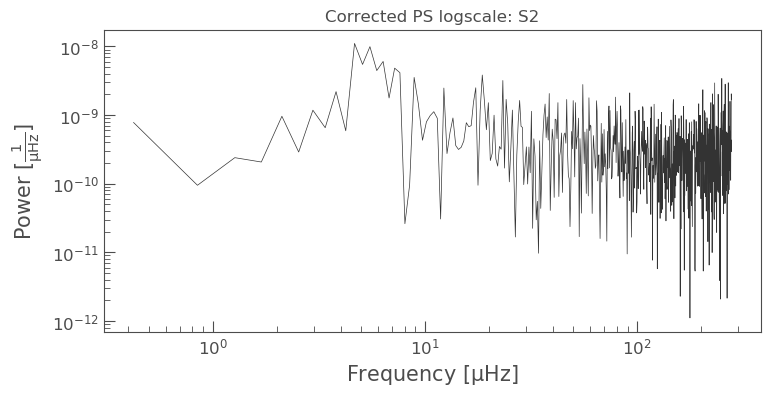

Text(0.5, 1.0, 'Combined Power Logged')

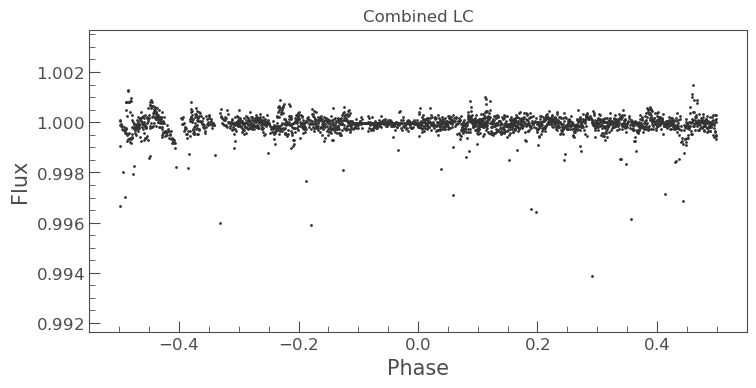

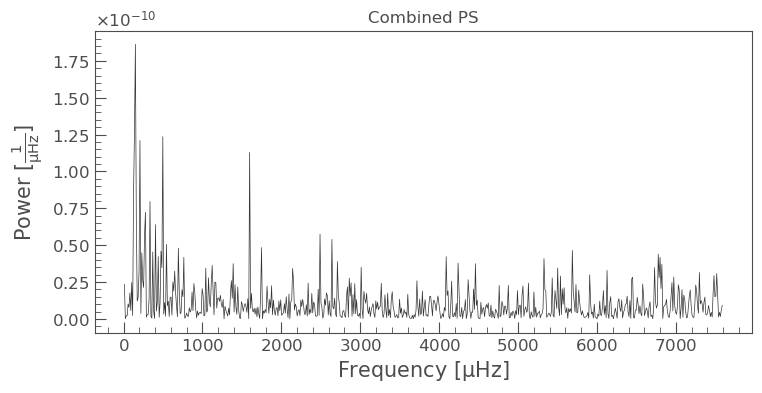

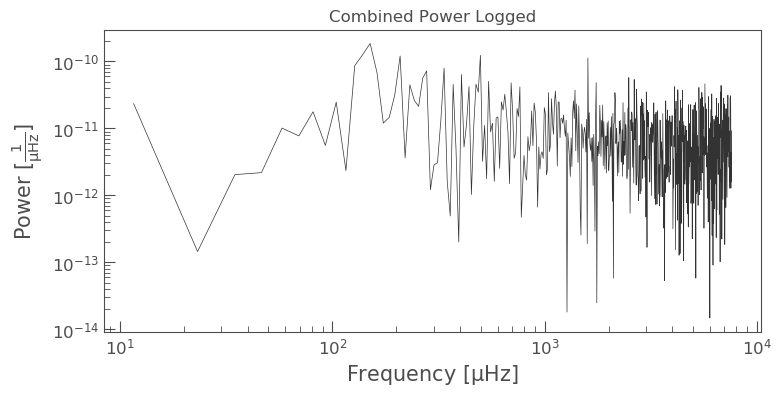

In [619]:
model11 = lk.TessLightCurve(time11,flux11,centroid_col = cent112, centroid_row = cent111).remove_nans().remove_outliers().flatten(window_length=145)
model11.scatter()
plt.title('Original LC: S1')
plt.show()
power11 = model11.to_periodogram(method='lombscargle', normalization="psd")
power11.plot()
plt.title('Original PS: S1')
plt.show()

model12 = lk.TessLightCurve(time12,flux12, centroid_col = cent122, centroid_row = cent121).remove_nans().remove_outliers().flatten(window_length=145)
model12.scatter()
plt.title('Original LC: S2')
plt.show()
power12 = model12.to_periodogram(method='lombscargle', normalization="psd")
power12.plot()
plt.title('Original PS: S2')
plt.show()


corrector11 = model11.remove_nans().to_corrector()
corrected_lc11 = corrector11.correct()

condition = ((corrected_lc11.time > 1347) & (corrected_lc11.time < 1350))
corrected_lc11.flux[condition] = np.median(corrected_lc11.flux)

corrected_lc11.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power11 =corrected_lc11.to_periodogram(method='lombscargle', normalization="psd")
corr_power11.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power11.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()


corrector12 = model12.remove_nans().to_corrector()
corrected_lc12 = corrector12.correct()

corrected_lc12.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power12 =corrected_lc12.to_periodogram(method='lombscargle', normalization="psd")
corr_power12.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power12.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()


#Now to combine and see
combined6 = corrected_lc11.append(corrected_lc12)
combined6.remove_outliers(sigma_lower = 2.5)
combined6 = combined6.fold(period=27)
combined6.scatter()
plt.title('Combined LC')
combined_power6 = combined6.to_periodogram(method='lombscargle', normalization="psd")
combined_power6.plot()
plt.title('Combined PS')
combined_power6.plot(scale='log')
plt.title('Combined Power Logged')

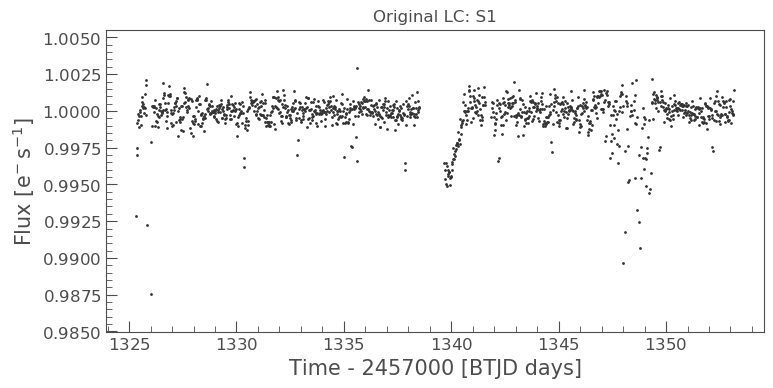

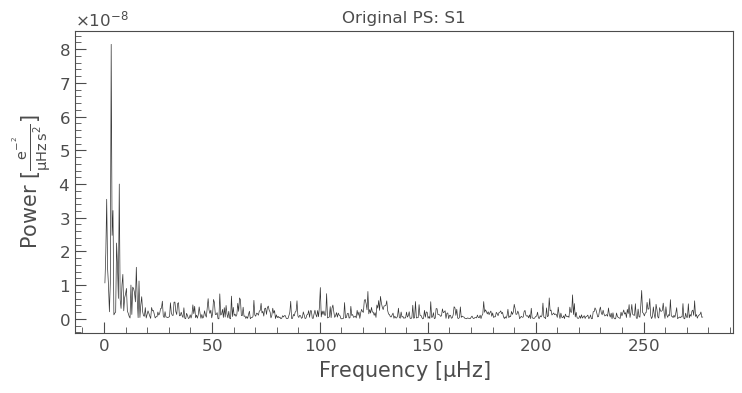

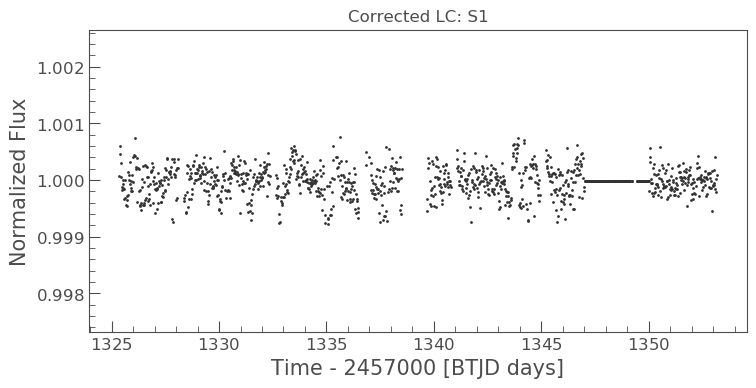

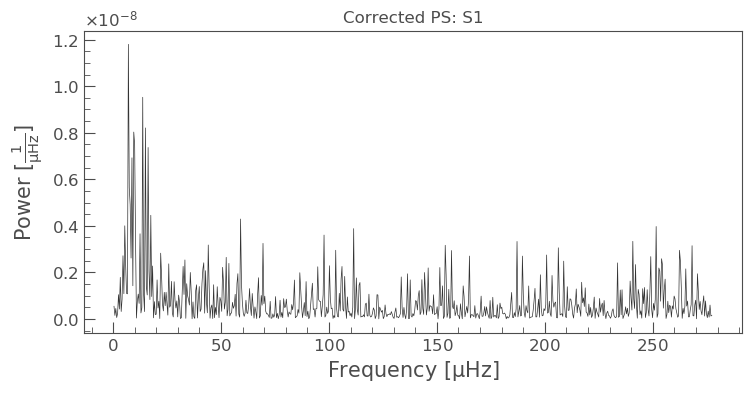

In [551]:
model13 = lk.TessLightCurve(time13,flux13,centroid_col = cent132, centroid_row = cent131).remove_nans().remove_outliers().flatten(window_length=145)
model13.scatter()
plt.title('Original LC: S1')
plt.show()
power13 = model11.to_periodogram(method='lombscargle', normalization="psd")
power13.plot()
plt.title('Original PS: S1')
plt.show()


corrector13 = model13.remove_nans().to_corrector()
corrected_lc13 = corrector11.correct()

condition = ((corrected_lc13.time > 1347) & (corrected_lc13.time < 1350))
corrected_lc13.flux[condition] = np.median(corrected_lc13.flux)

corrected_lc13.remove_outliers(sigma_lower=3, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power13 =corrected_lc13.to_periodogram(method='lombscargle', normalization="psd")
corr_power13.plot()
plt.title('Corrected PS: S1')
plt.show()



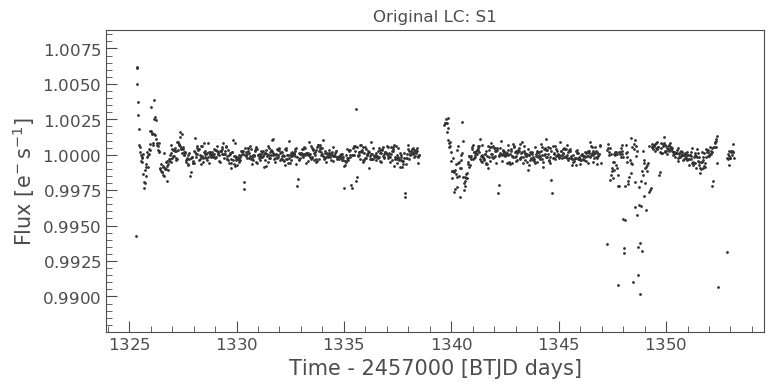

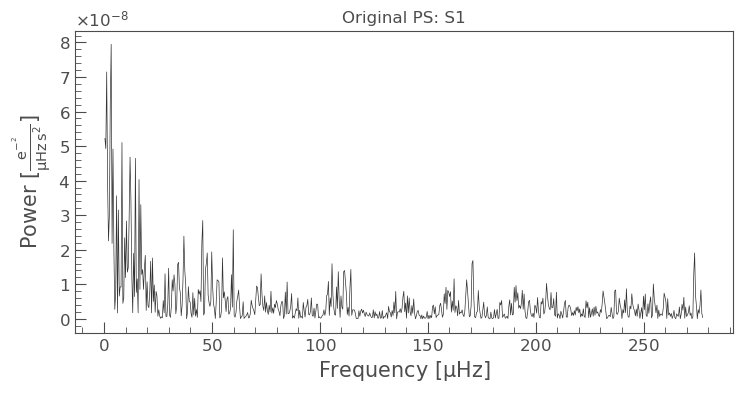

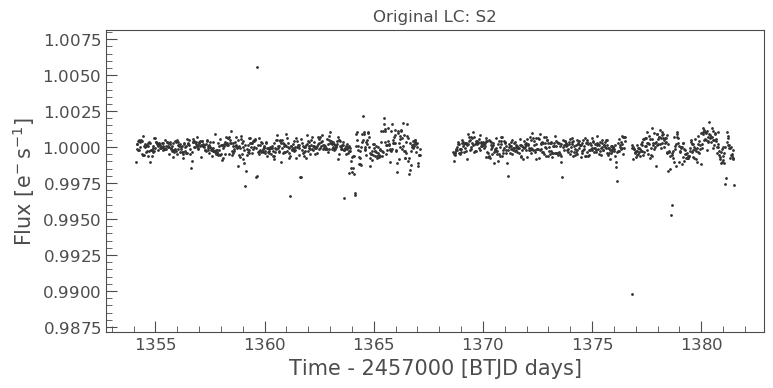

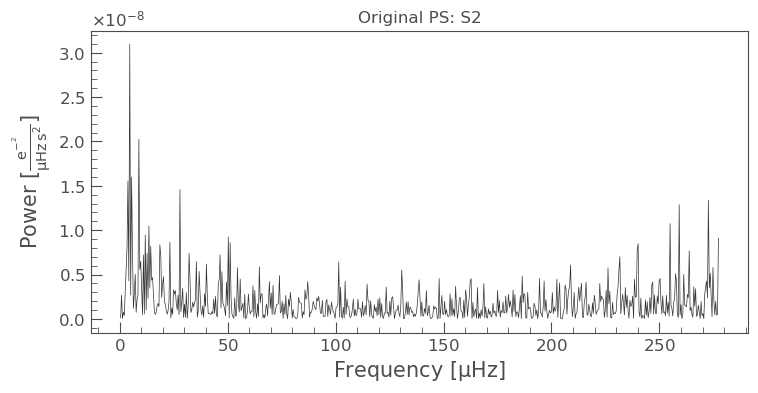

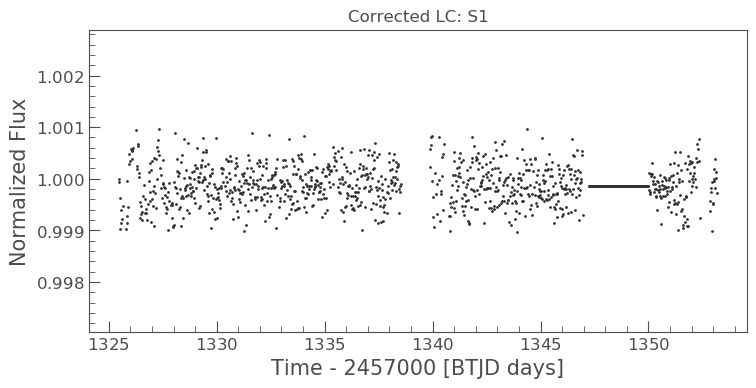

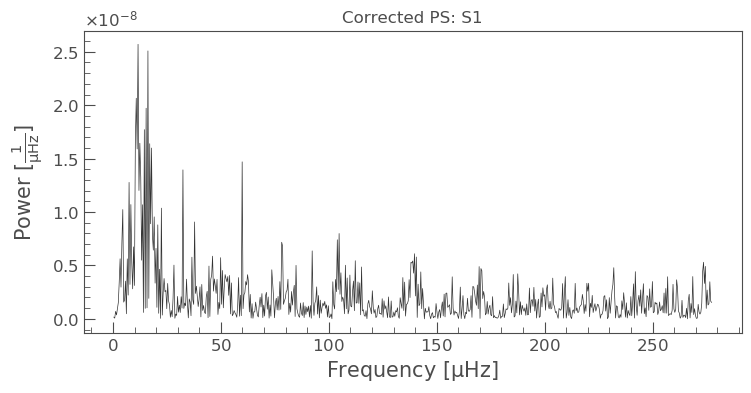

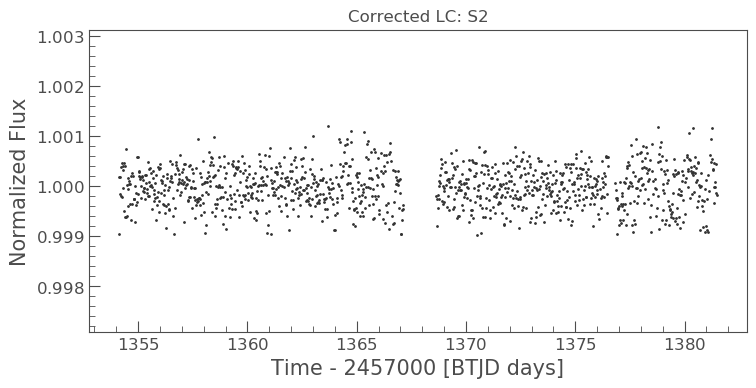

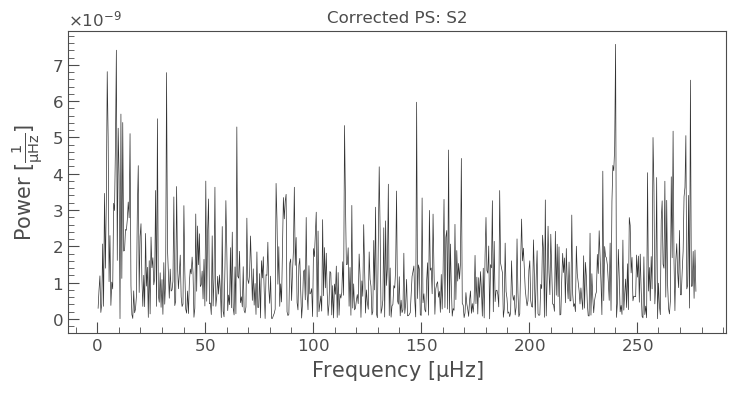

Text(0.5, 1.0, 'Combined Power Logged')

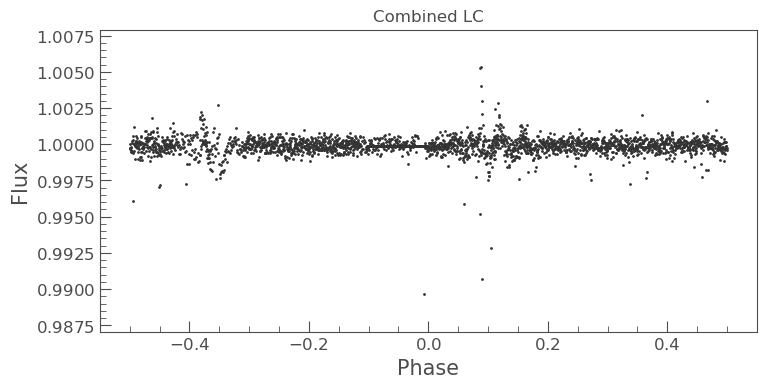

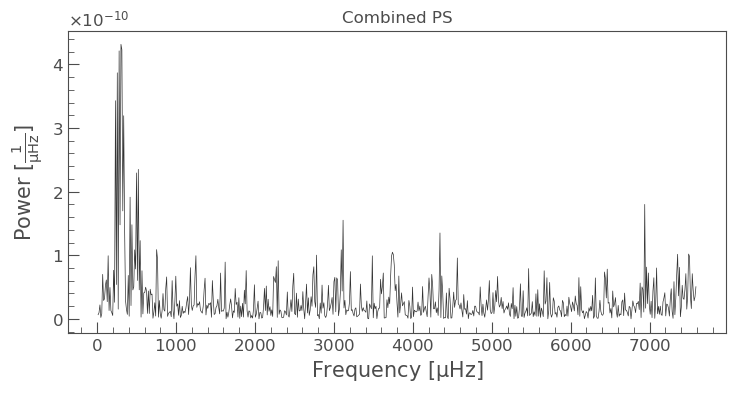

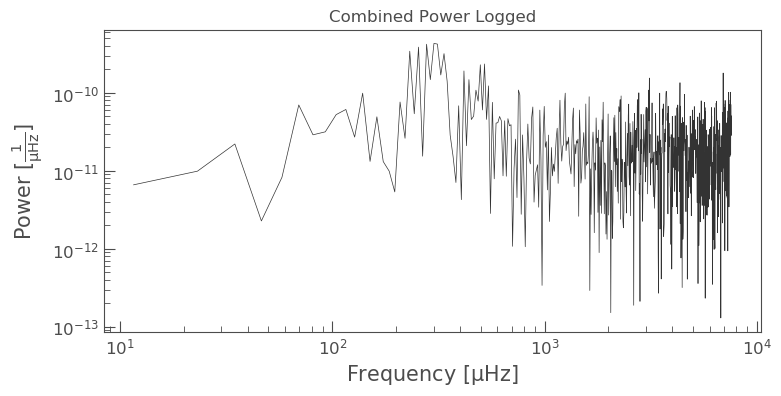

In [608]:
model14 = lk.TessLightCurve(time14,flux14,centroid_col = cent142, centroid_row = cent141).remove_nans().remove_outliers().flatten(window_length=145)
model14.scatter()
plt.title('Original LC: S1')
plt.show()
power14 = model14.to_periodogram(method='lombscargle', normalization="psd")
power14.plot()
plt.title('Original PS: S1')
plt.show()

model15 = lk.TessLightCurve(time15,flux15, centroid_col = cent152, centroid_row = cent151).remove_nans().remove_outliers().flatten(window_length=145)
model15.scatter()
plt.title('Original LC: S2')
plt.show()
power15 = model15.to_periodogram(method='lombscargle', normalization="psd")
power15.plot()
plt.title('Original PS: S2')
plt.show()


corrector14 = model14.remove_nans().to_corrector()
corrected_lc14 = corrector14.correct()

condition = ((corrected_lc14.time > 1347) & (corrected_lc14.time < 1350))
corrected_lc14.flux[condition] = np.median(corrected_lc14.flux)

corrected_lc14.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power14 =corrected_lc14.to_periodogram(method='lombscargle', normalization="psd")
corr_power14.plot()
plt.title('Corrected PS: S1')
plt.show()

corrector15 = model15.remove_nans().to_corrector()
corrected_lc15 = corrector15.correct()

corrected_lc15.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power15 =corrected_lc15.to_periodogram(method='lombscargle', normalization="psd")
corr_power15.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined7 = corrected_lc14.append(corrected_lc15)
combined7.remove_outliers(sigma_lower = 2.5)
combined7 = combined7.fold(period=27)
combined7.scatter()
plt.title('Combined LC')
combined_power7 = combined7.to_periodogram(method='lombscargle', normalization="psd")
combined_power7.plot()
plt.title('Combined PS')
combined_power7.plot(scale='log')
plt.title('Combined Power Logged')

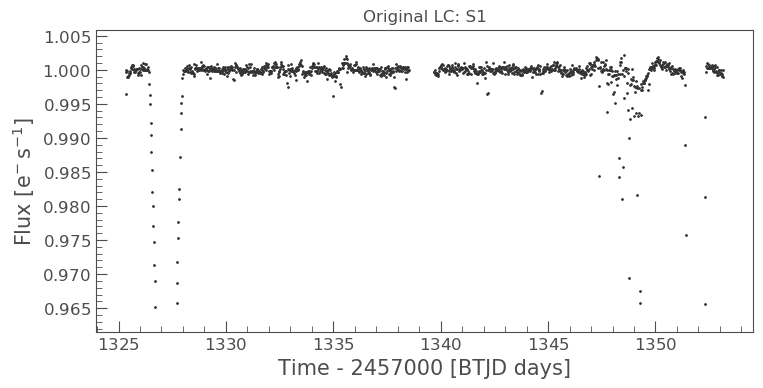

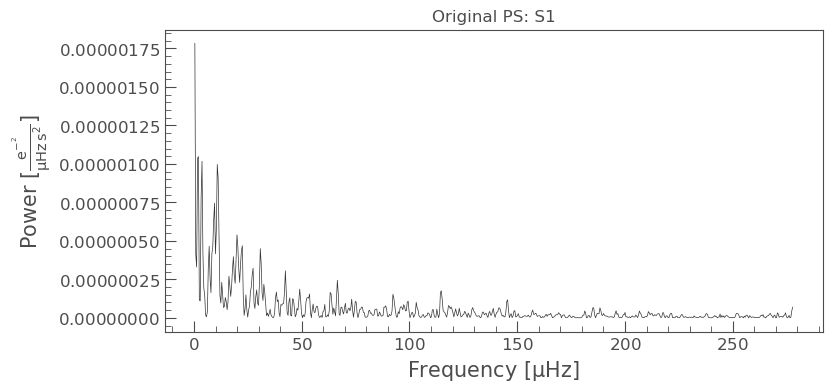

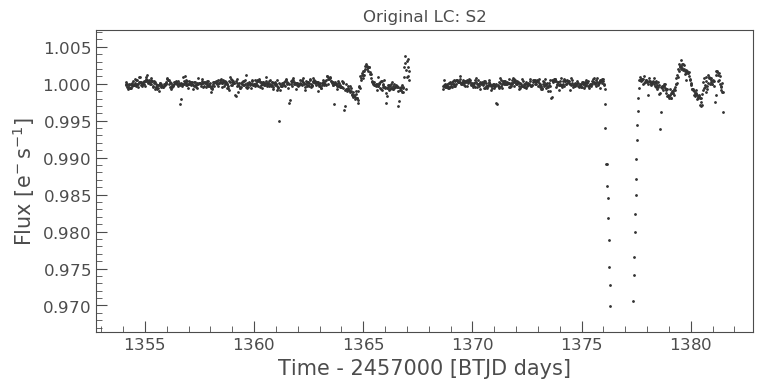

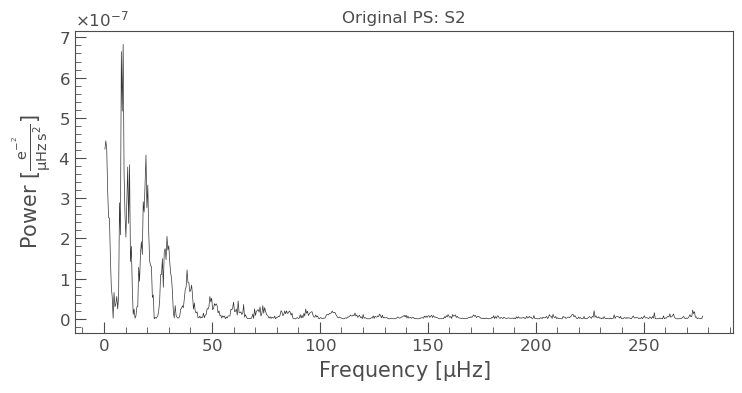

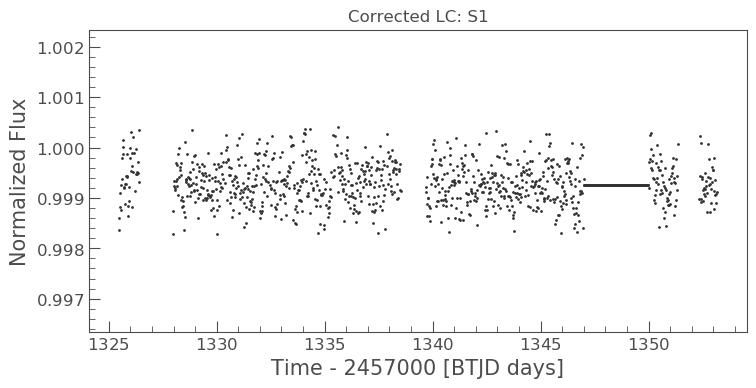

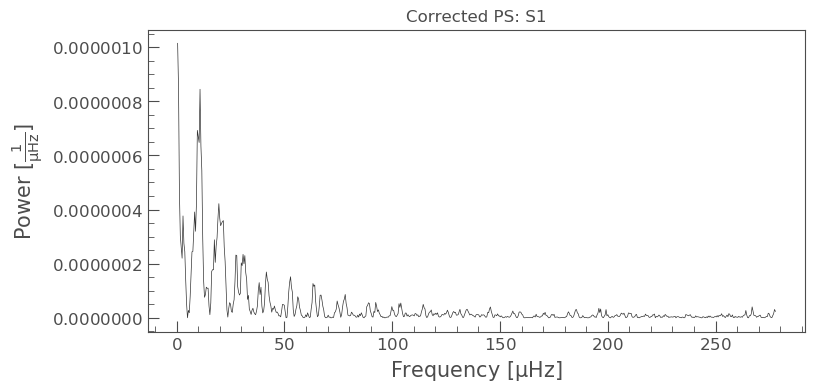

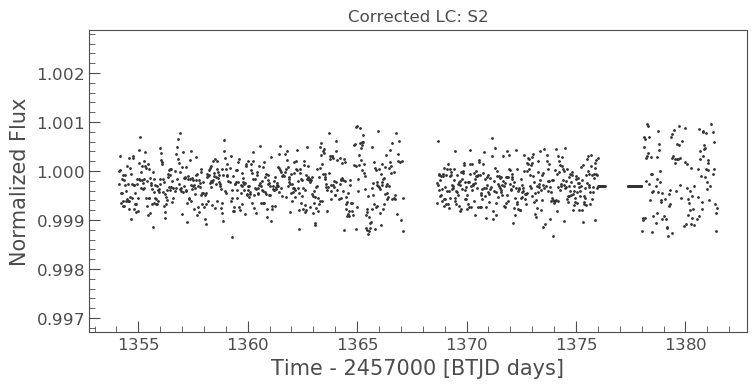

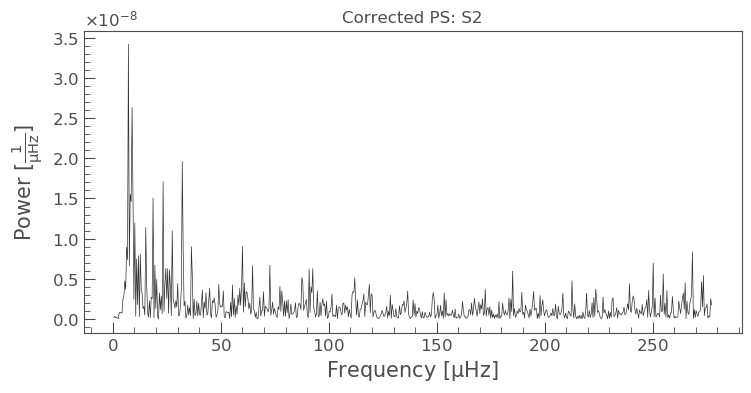

Text(0.5, 1.0, 'Combined Power Logged')

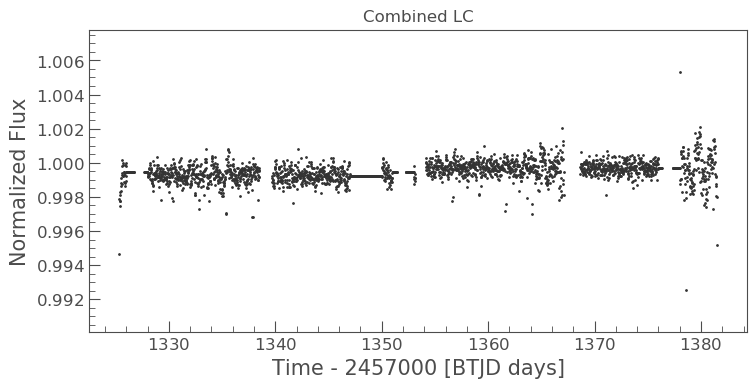

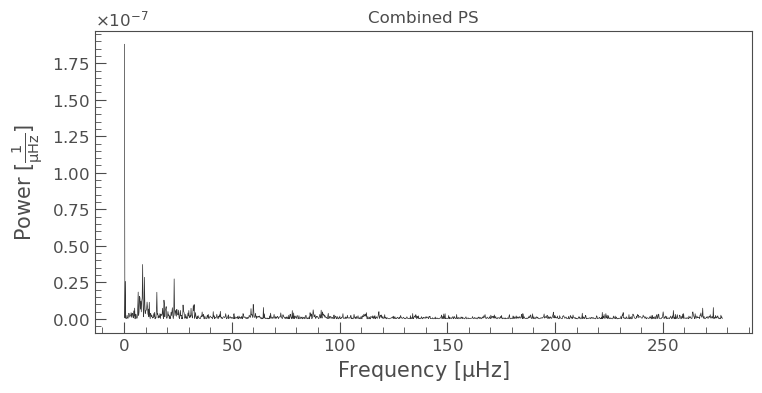

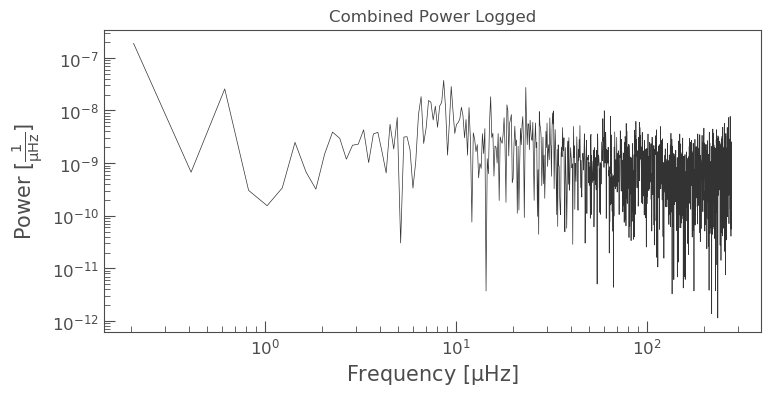

In [612]:
model16 = lk.TessLightCurve(time16,flux16,centroid_col = cent162, centroid_row = cent161).remove_nans().remove_outliers().flatten(window_length=145)
model16.scatter()
plt.title('Original LC: S1')
plt.show()
power16 = model16.to_periodogram(method='lombscargle', normalization="psd")
power16.plot()
plt.title('Original PS: S1')
plt.show()

model17 = lk.TessLightCurve(time17,flux17, centroid_col = cent172, centroid_row = cent171).remove_nans().remove_outliers().flatten(window_length=145)
model17.scatter()
plt.title('Original LC: S2')
plt.show()
power17 = model17.to_periodogram(method='lombscargle', normalization="psd")
power17.plot()
plt.title('Original PS: S2')
plt.show()


corrector16 = model16.remove_nans().to_corrector()
corrected_lc16 = corrector16.correct()

condition = ((corrected_lc16.time > 1347) & (corrected_lc16.time < 1350))
corrected_lc16.flux[condition] = np.median(corrected_lc16.flux)

corrected_lc16.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power16 =corrected_lc16.to_periodogram(method='lombscargle', normalization="psd")
corr_power16.plot()
plt.title('Corrected PS: S1')
plt.show()

corrector17 = model17.remove_nans().to_corrector()
corrected_lc17 = corrector17.correct()

condition = ((corrected_lc17.time > 1376) & (corrected_lc17.time < 1378))
corrected_lc17.flux[condition] = np.median(corrected_lc17.flux)

corrected_lc17.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power17 =corrected_lc17.to_periodogram(method='lombscargle', normalization="psd")
corr_power17.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined8 = corrected_lc16.append(corrected_lc17)
condition = ((combined8.time > 1326) & (combined8.time < 1328))
condition |= ((combined8.time > 1351) & (combined8.time < 1353))
combined8.flux[condition] = np.median(combined8.flux)
#combined8 = combined8.fold(period = 27)
#combined8.remove_outliers(sigma_lower = 2)
combined8.scatter()
plt.title('Combined LC')
combined_power8 = combined8.to_periodogram(method='lombscargle', normalization="psd")
combined_power8.plot()
plt.title('Combined PS')
combined_power8.plot(scale='log')
plt.title('Combined Power Logged')

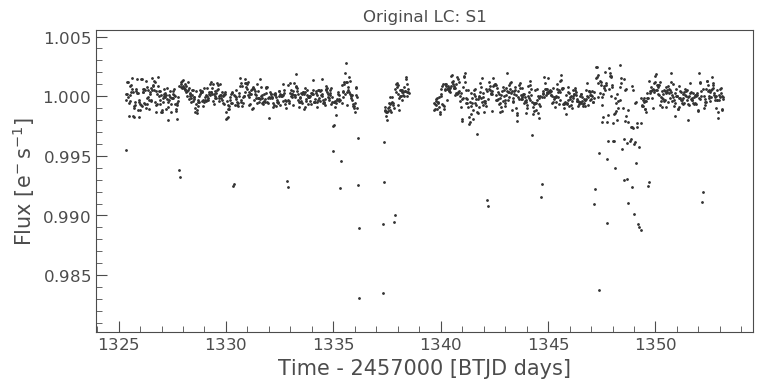

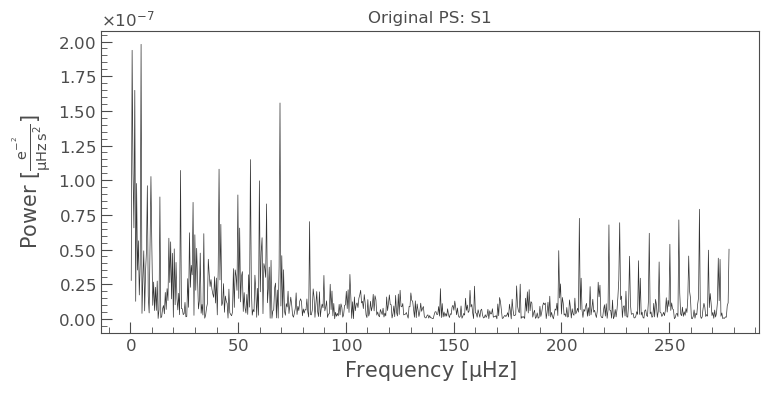

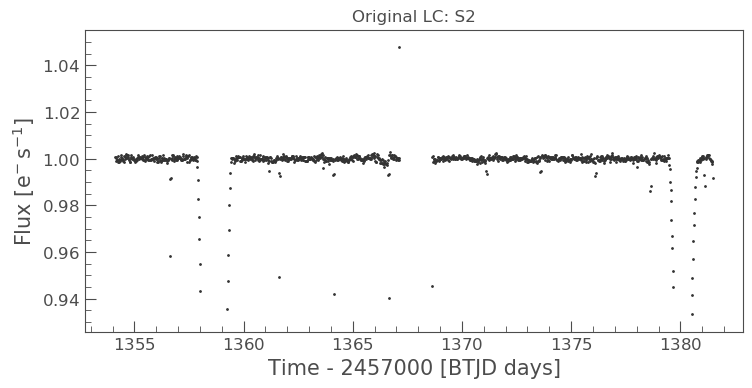

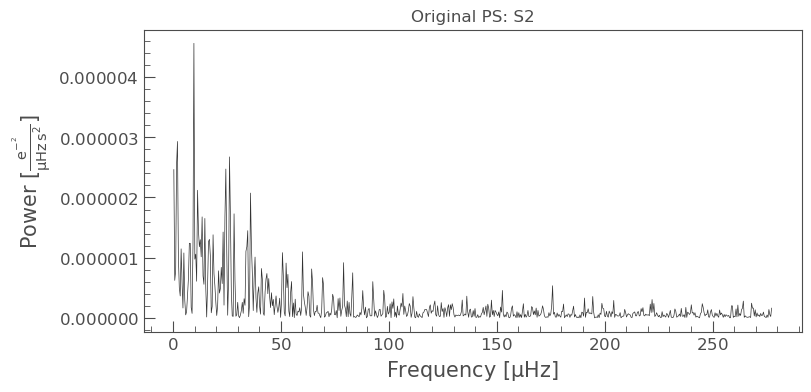

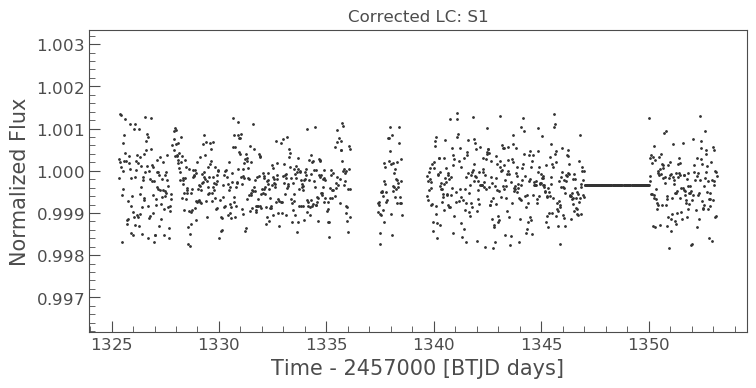

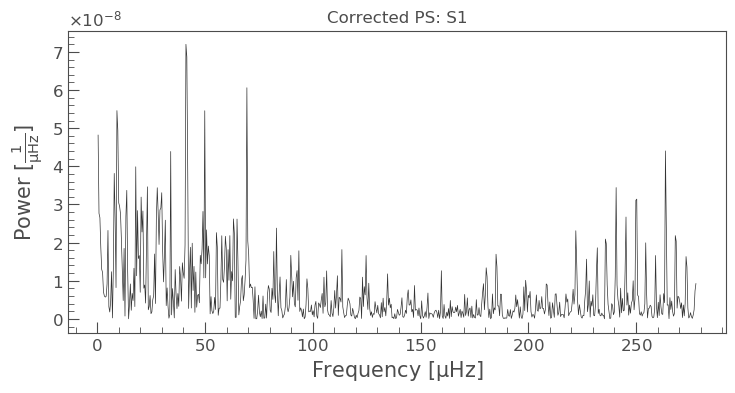

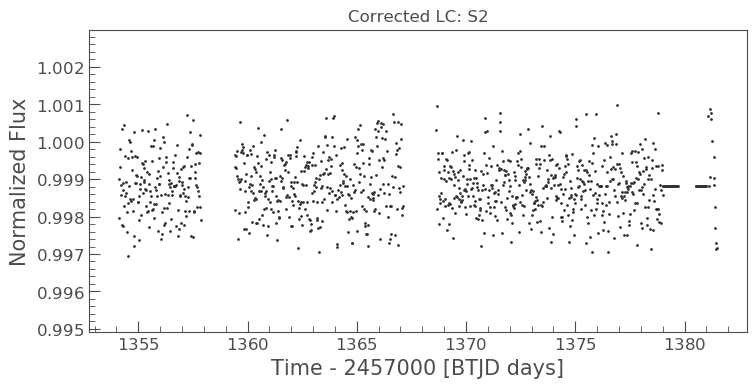

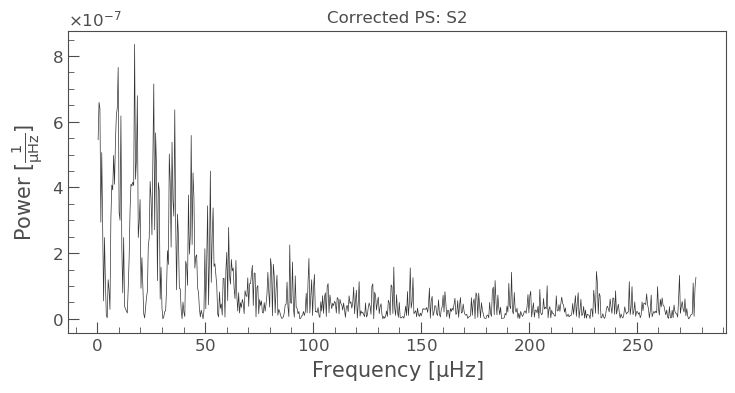

Text(0.5, 1.0, 'Combined Power Logged')

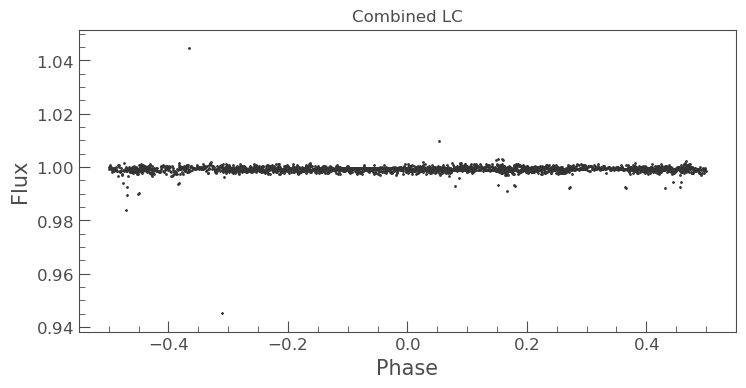

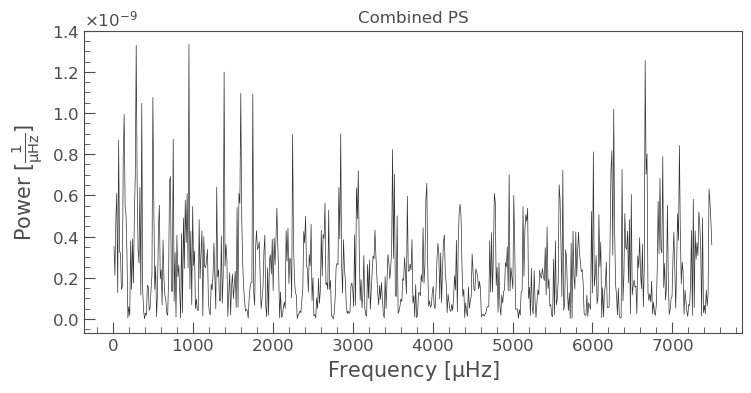

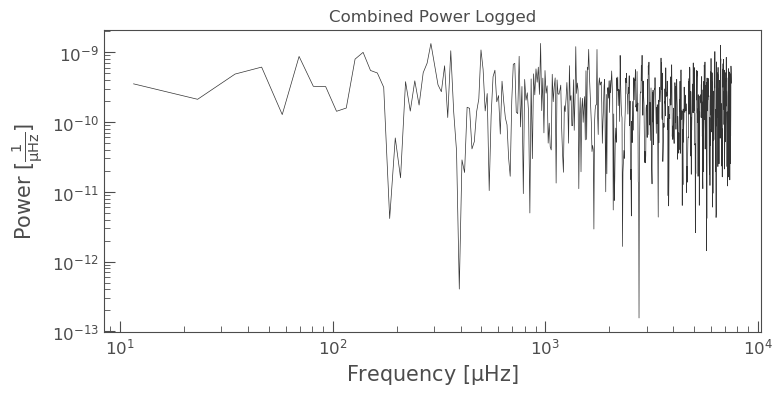

In [610]:
model18 = lk.TessLightCurve(time18,flux18,centroid_col = cent182, centroid_row = cent181).remove_nans().remove_outliers().flatten(window_length=145)
model18.scatter()
plt.title('Original LC: S1')
plt.show()
power18 = model18.to_periodogram(method='lombscargle', normalization="psd")
power18.plot()
plt.title('Original PS: S1')
plt.show()

model19 = lk.TessLightCurve(time19,flux19, centroid_col = cent192, centroid_row = cent191).remove_nans().remove_outliers().flatten(window_length=145)
model19.scatter()
plt.title('Original LC: S2')
plt.show()
power19 = model19.to_periodogram(method='lombscargle', normalization="psd")
power19.plot()
plt.title('Original PS: S2')
plt.show()


corrector18 = model18.remove_nans().to_corrector()
corrected_lc18 = corrector18.correct()

condition = ((corrected_lc18.time > 1347) & (corrected_lc18.time < 1350))
corrected_lc18.flux[condition] = np.median(corrected_lc18.flux)

corrected_lc18.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power18 =corrected_lc18.to_periodogram(method='lombscargle', normalization="psd")
corr_power18.plot()
plt.title('Corrected PS: S1')
plt.show()

corrector19 = model19.remove_nans().to_corrector()
corrected_lc19 = corrector19.correct()

condition = ((corrected_lc19.time > 1379) & (corrected_lc19.time < 1381))
corrected_lc19.flux[condition] = np.median(corrected_lc19.flux)

corrected_lc19.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power19 =corrected_lc19.to_periodogram(method='lombscargle', normalization="psd")
corr_power19.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined9 = corrected_lc18.append(corrected_lc19)
condition = ((combined9.time > 1336) & (combined9.time < 1337))
condition |= ((combined9.time > 1357.5) & (combined9.time < 1360))
combined9.flux[condition] = np.median(combined9.flux)
combined9 = combined9.fold(period = 27)
#combined8.remove_outliers(sigma_lower = 2)
combined9.scatter()
plt.title('Combined LC')
combined_power9 = combined9.to_periodogram(method='lombscargle', normalization="psd")
combined_power9.plot()
plt.title('Combined PS')
combined_power9.plot(scale='log')
plt.title('Combined Power Logged')

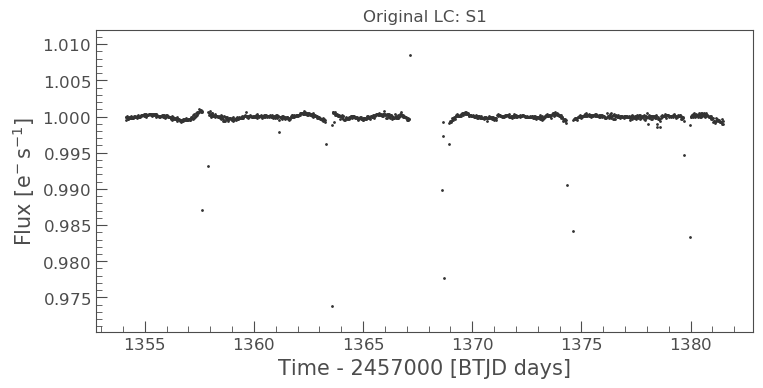

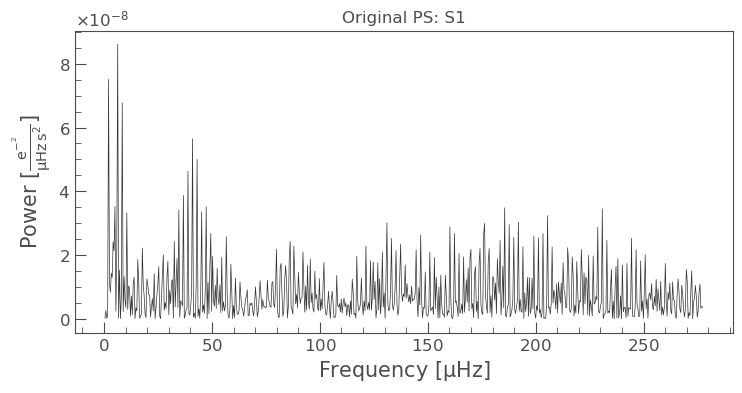

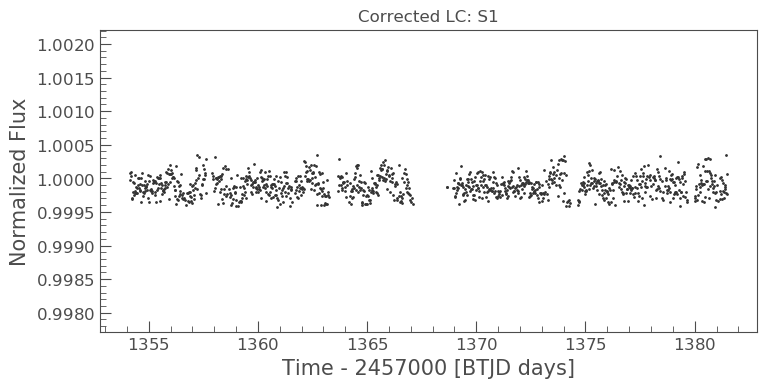

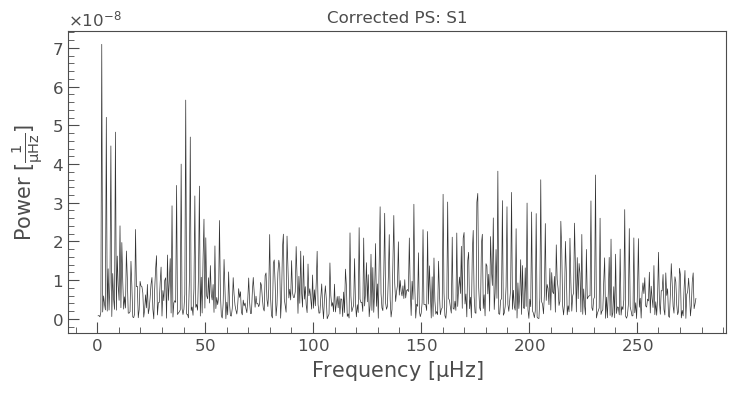

In [585]:
model20 = lk.TessLightCurve(time20,flux20,centroid_col = cent202, centroid_row = cent201).remove_nans().remove_outliers().flatten(window_length=145)
model20.scatter()
plt.title('Original LC: S1')
plt.show()
power20 = model20.to_periodogram(method='lombscargle', normalization="psd")
power20.plot()
plt.title('Original PS: S1')
plt.show()

corrector20 = model20.remove_nans().to_corrector()
corrected_lc20 = corrector20.correct()

#condition = ((corrected_lc20.time > 1347) & (corrected_lc20.time < 1350))
#corrected_lc20.flux[condition] = np.median(corrected_lc20.flux)

corrected_lc20.remove_outliers(sigma_lower=2, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power20 =corrected_lc20.to_periodogram(method='lombscargle', normalization="psd")
corr_power20.plot()
plt.title('Corrected PS: S1')
plt.show()




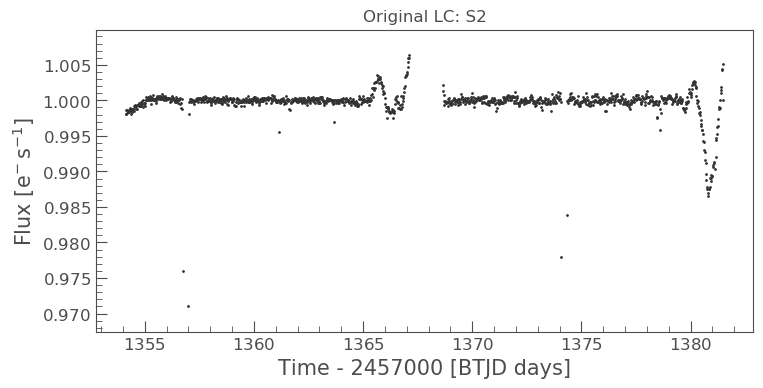

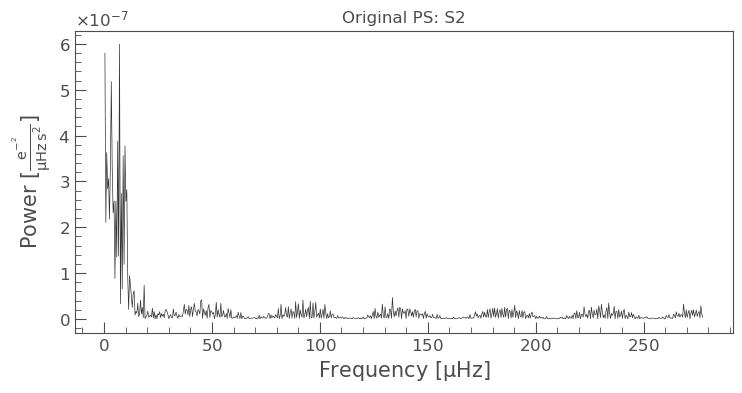

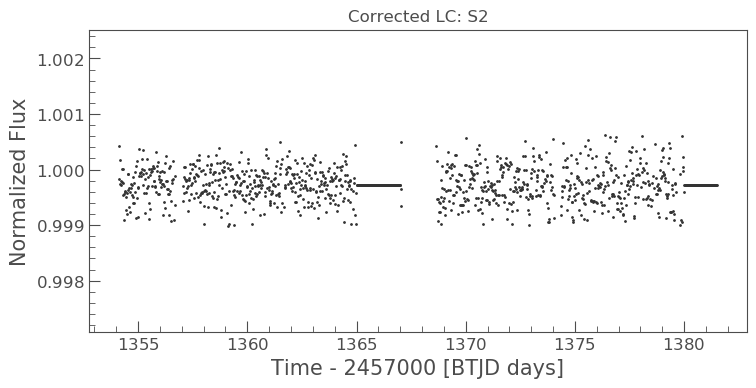

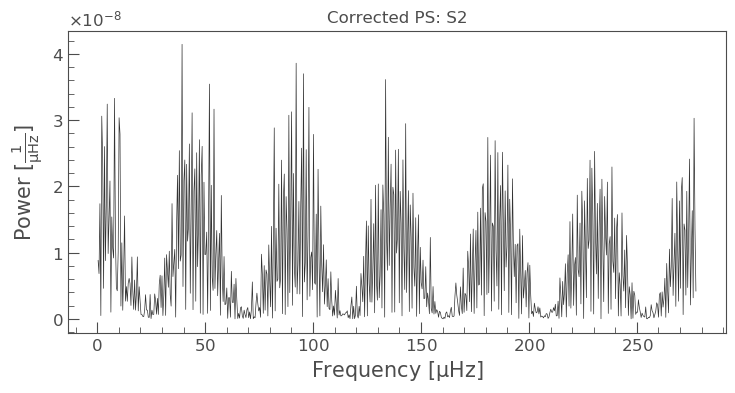

In [588]:
model21 = lk.TessLightCurve(time21,flux21, centroid_col = cent212, centroid_row = cent211).remove_nans().remove_outliers().flatten(window_length=145)
model21.scatter()
plt.title('Original LC: S2')
plt.show()
power21 = model21.to_periodogram(method='lombscargle', normalization="psd")
power21.plot()
plt.title('Original PS: S2')
plt.show()

corrector21 = model21.remove_nans().to_corrector()
corrected_lc21 = corrector21.correct()

condition = ((corrected_lc21.time > 1380))
condition |= ((corrected_lc21.time > 1365) & (corrected_lc21.time < 1367))
corrected_lc21.flux[condition] = np.median(corrected_lc21.flux)

corrected_lc21.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power21 =corrected_lc21.to_periodogram(method='lombscargle', normalization="psd")
corr_power21.plot()
plt.title('Corrected PS: S2')
plt.show()

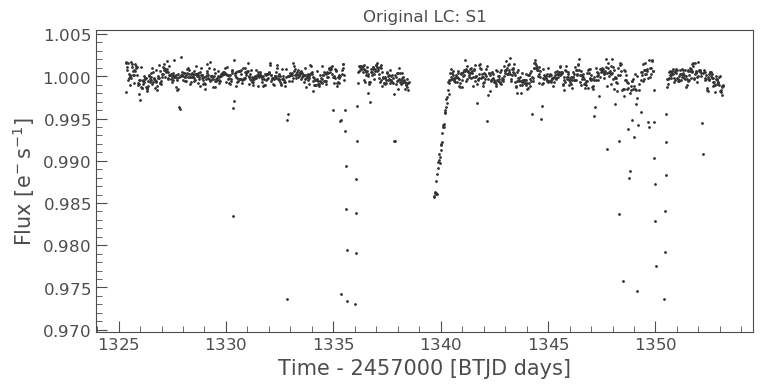

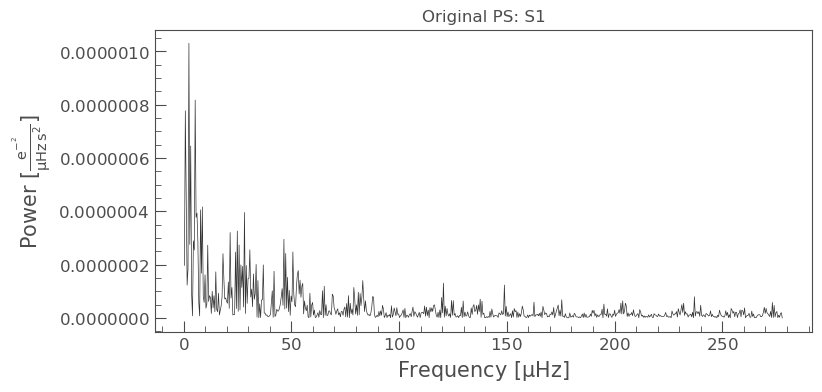

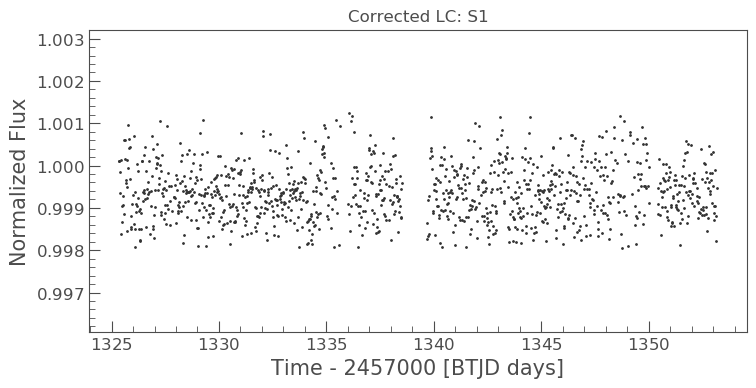

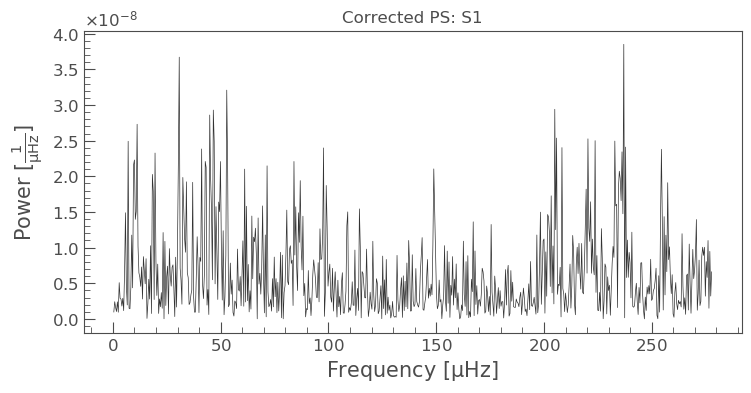

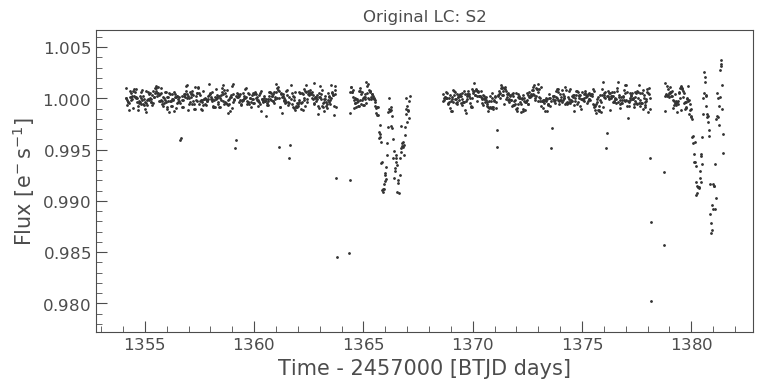

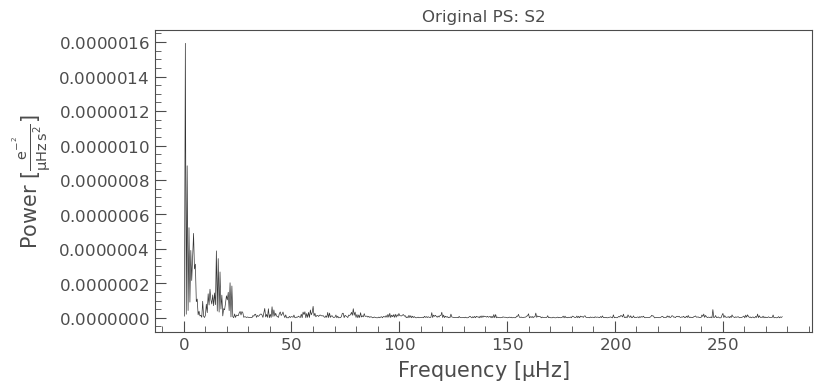

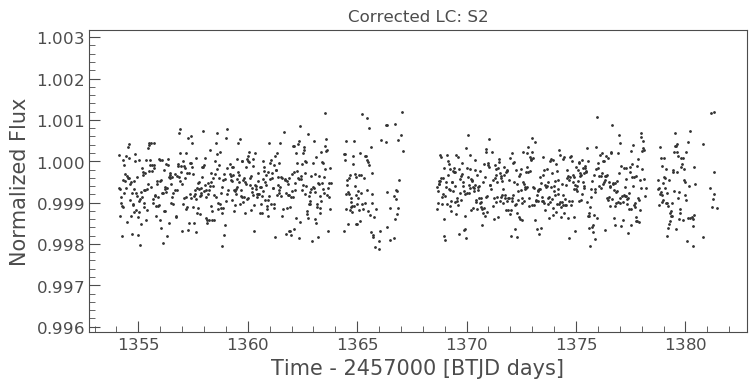

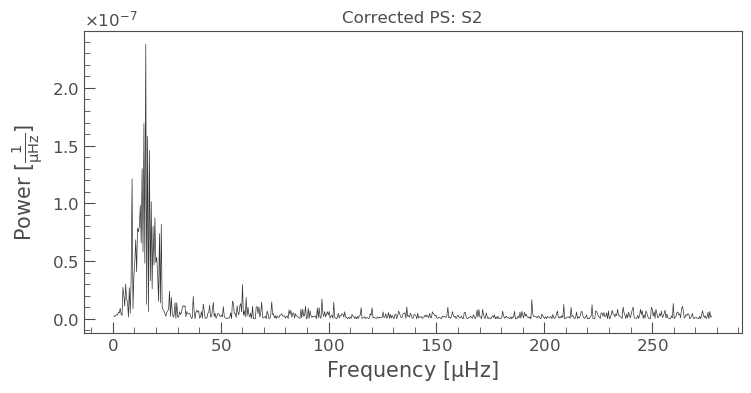

Text(0.5, 1.0, 'Combined Power Logged')

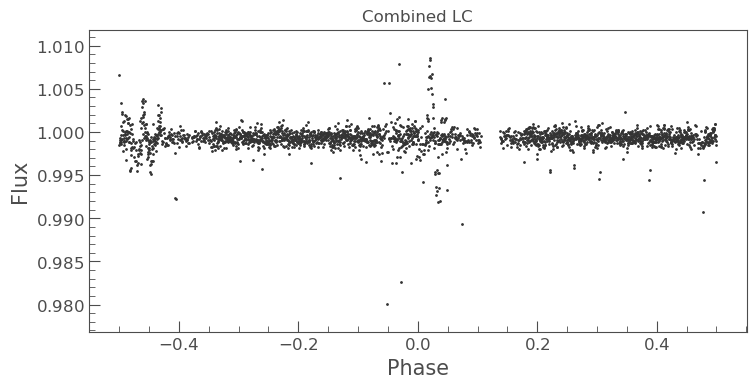

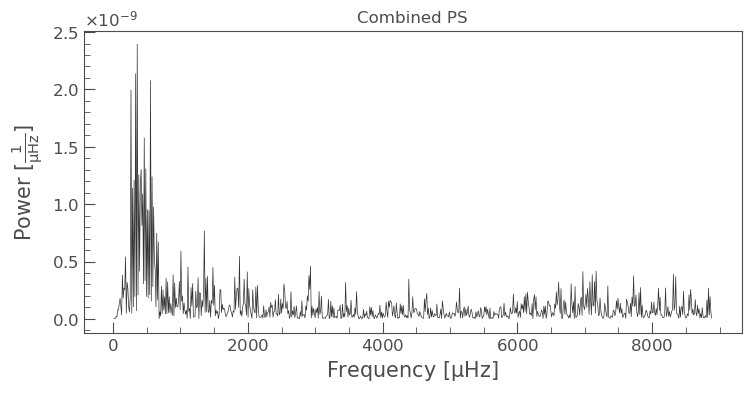

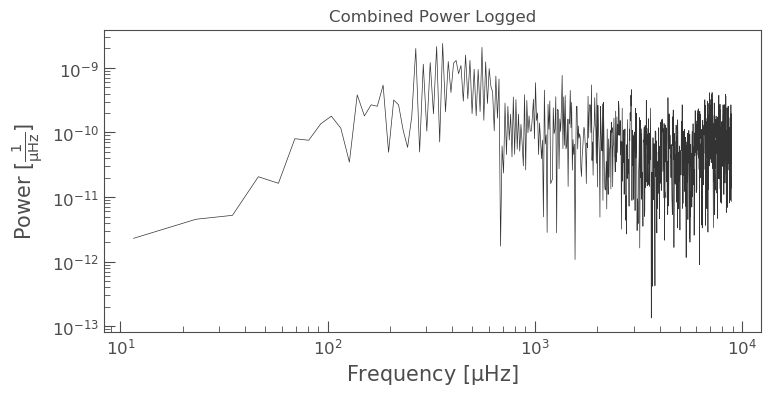

In [611]:
model22 = lk.TessLightCurve(time22,flux22,centroid_col = cent222, centroid_row = cent221).remove_nans().remove_outliers().flatten(window_length=145)
model22.scatter()
plt.title('Original LC: S1')
plt.show()
power22 = model22.to_periodogram(method='lombscargle', normalization="psd")
power22.plot()
plt.title('Original PS: S1')
plt.show()

corrector22 = model22.remove_nans().to_corrector()
corrected_lc22 = corrector22.correct()

#condition = ((corrected_lc20.time > 1347) & (corrected_lc20.time < 1350))
#corrected_lc20.flux[condition] = np.median(corrected_lc20.flux)

corrected_lc22.remove_outliers(sigma_lower=2, sigma_upper=3).scatter()
plt.title('Corrected LC: S1')
corr_power22 =corrected_lc22.to_periodogram(method='lombscargle', normalization="psd")
corr_power22.plot()
plt.title('Corrected PS: S1')
plt.show()

model23 = lk.TessLightCurve(time23,flux23, centroid_col = cent232, centroid_row = cent231).remove_nans().remove_outliers().flatten(window_length=145)
model23.scatter()
plt.title('Original LC: S2')
plt.show()
power23 = model23.to_periodogram(method='lombscargle', normalization="psd")
power23.plot()
plt.title('Original PS: S2')
plt.show()

corrector23 = model23.remove_nans().to_corrector()
corrected_lc23 = corrector23.correct()

#condition = ((corrected_lc23.time > 1380))
#condition |= ((corrected_lc23.time > 1365) & (corrected_lc23.time < 1367))
#corrected_lc23.flux[condition] = np.median(corrected_lc23.flux)

corrected_lc23.remove_outliers(sigma_lower=2.5, sigma_upper=3).scatter()
plt.title('Corrected LC: S2')
corr_power23 =corrected_lc23.to_periodogram(method='lombscargle', normalization="psd")
corr_power23.plot()
plt.title('Corrected PS: S2')
plt.show()

#Now to combine and see
combined10 = corrected_lc22.append(corrected_lc23)
#condition = ((combined9.time > 1336) & (combined9.time < 1337))
#condition |= ((combined9.time > 1357.5) & (combined9.time < 1360))
#combined9.flux[condition] = np.median(combined9.flux)
combined10 = combined10.fold(period = 30)
#combined8.remove_outliers(sigma_lower = 2)
combined10.scatter()
plt.title('Combined LC')
combined_power10 = combined10.to_periodogram(method='lombscargle', normalization="psd")
combined_power10.plot()
plt.title('Combined PS')
combined_power10.plot(scale='log')
plt.title('Combined Power Logged')

(2,)
regressors DesignMatrix (2, 2)
Slope and intercept: -17.29598255151659 25718.249864524507
sigma: 0.8499806162740354


ValueError: x and y must be the same size

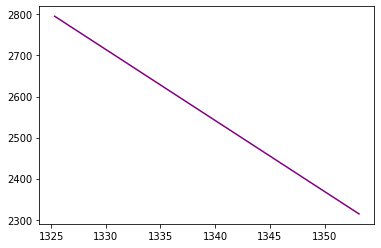

In [620]:
#Determine the set of regressors
regressor = (model1.time, fluxbkg)
print(np.shape(regressor))
regressor = np.transpose(regressor)
#regressor = np.array(regressor)
#plt.plot(regressor[0], regressor[1]) 
#plt.title('Plot of regressors')



#create the design matrix of regressors
df = pd.DataFrame(data = regressor)
dmatrix = lk.DesignMatrix(regressor, name='regressors')
dmatrix = dmatrix.append_constant(1)
print(dmatrix)


#Reduce the number of matricies to make sure to not cut needed signal
#Now employ linear regression / least-squares regression
#Using method from prior exercise for linear regression 
slope, interc, r_value, p_value, std_dev = st.linregress(time1, fluxbkg)
print('Slope and intercept:', slope, interc)
print('sigma:',std_dev)
model_eq = np.poly1d([slope,interc])

#Test the model with the data
y_values = model_eq(time1)
y_values = np.array(y_values)
plt.plot(time1, y_values, color = 'purple')
mean_flux = np.nanmean(model1.flux)
normflux= model1.flux/mean_flux - 1
plt.scatter(time1,normflux, s=3)
plt.title('Regular plots of both datasets')
plt.show()

#now subtract the new model from previous model since the noise is additive in the flux
#maybe try to just subtract the fluxes
reduced_flux = model1.flux - y_values
regression_lc = lk.LightCurve(model1.time,reduced_flux).remove_nans().remove_outliers().flatten(window_length=145)
regression_lc.scatter()
plt.title('Regression lightcurve')
plt.show()
corrected_lc = model1 - regression_lc
corrected_lc.scatter()
plt.title('Corrected Lightcurve')
#Now test for diff in power spectrum
power_reduced = corrected_lc.to_periodogram(method='lombscargle', normalization="psd")
power_reduced.plot()
plt.title('Corrected Power Spectrum')
